# **Importing Resources**

In [ ]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# **Loading the Dataset from Google Drive**

If you are running the notebook using Colab and have the files in Google Drive, run the following three lines of code.

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Ensure to change the file path accordingly
file_path = '/content/drive/MyDrive/[CSCI 113i] Final Project - Group 7/superstore_data.csv'

In [ ]:
df = pd.read_csv(file_path)

# **Loading the Dataset from Local Device**

If you are running the notebook and have the files in your local device, run the following two lines of code.

In [ ]:
# Before running this line of code, ensure that the CSV file and the script are in the same folder
# local_file_path = 'superstore_data.csv'

In [ ]:
# df = pd.read_csv(local_file_path)

# **Describing the Dataset**

This data was gathered during last year's campaign.
Data description is as follows:

- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- ID - Unique ID of each customer
- Year_Birth - Age of the customer
- Complain - 1 if the customer complained in the last 2 years
- Dt_Customer - date of customer's enrollment with the company
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website in the last month
- Recency - number of days since the last purchase

In [ ]:
df.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,130,411,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,80,252,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,0,11,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,0,102,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,0,102,21,32,5,3,6,2,9,4,0,0


In [ ]:
pd.set_option('display.max_columns', None)
df.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,130,411,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,80,252,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,0,11,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,0,102,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,0,102,21,32,5,3,6,2,9,4,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We can get the following information from the results of _info()_:
- There are 2240 rows in our dataframe.
- There are 22 columns: 18 columns are integers, 1 is float (or continuous), and 3 are generic objects, which are strings.
- Only the _Income_ column have null or missing values of 24 count. This is helpful later when we deal with missing values.
- The _Dt_Customer_ column, which is supposed to represent a date, is not in datetime format and will need to be converted for proper date-based analysis.

In [ ]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


The descriptive statistics table shows all columns that are numerical in the dataset. While most represent continuous or count-based values, we can confirm that Complain and Response are categorical in nature. Both have a minimum of 0 and a maximum of 1, indicating they are binary variables despite being numerically encoded.

In [ ]:
df[df.duplicated()]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain


Using this function to check for duplicates, we were able to verify that there are **no duplicates found** in the dataset.

In [ ]:
# Show only which columns have null values and count
df.isnull().sum()[df.isnull().sum() > 0]

,0
Income,24


In [ ]:
df.nunique()

,0
Id,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


The function above allows us to further analyze the dataset by checking the number of **unique values for each column**.

In [ ]:
df['Education'].value_counts().reset_index()

,Education,count
0,Graduation,1127
1,PhD,486
2,Master,370
3,2n Cycle,203
4,Basic,54


This output is used to check the values within the Education column, which contains categorical data. It helps identify the unique categories and their distribution. From the result, we can observe the following issues:

- The category 2n Cycle refers to the second cycle of higher education, which is equivalent to a master’s degree under the Bologna Process. It should be grouped with Master.

- To improve clarity and standardization:

  - Rename Graduation to Bachelors
  - Rename Master to Masters



In [ ]:
df['Marital_Status'].value_counts().reset_index()

,Marital_Status,count
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Alone,3
6,YOLO,2
7,Absurd,2


This output checks the unique values within the Marital_Status column, which contains categorical data. The results reveal an issue with inconsistent category labels:

- The entries Alone, YOLO, and Absurd do not align with the standard marital status categories.

- These labels could be interpreted as variations of being single and may be grouped with Single during preprocessing to ensure consistency.

In [ ]:
df['Response'].value_counts().reset_index()

,Response,count
0,0,1906
1,1,334


This counts the occurrences of each unique value in the Response column.

- There are 1,906 counts for 0 (did not accept) and 334 counts for 1 (accepted), indicating that most customers did not respond positively to the marketing campaign.

- This also confirms that Response is a categorical variable, specifically a binary indicator.

In [ ]:
df['Complain'].value_counts().reset_index()

,Complain,count
0,0,2219
1,1,21


This counts the occurrences of each unique value in the Complain column.

- There are 2,219 counts for 0 (did not complain) and 21 counts for 1 (complained), indicating that most customers did not file a complaint in the last two years.

- This also confirms that Complain is a categorical variable, represented as a binary indicator.

# **Cleaning the Dataset**

We are now moving to cleaning the dataset to resolve issues identified earlier before performing exploratory data analysis (EDA).

- This step ensures that inconsistent, missing, or misleading values are addressed.

- Cleaning improves the quality and reliability of insights, reduces noise, and helps avoid skewed or incorrect interpretations during EDA.

In [ ]:
cleaned_df = df.copy()

We use `cleaned_df = df.copy()` to preserve the original dataset, allowing us to clean and modify the data without altering the raw version.










## Dropping the Id Column

This part drops the `ID` column, as it is only a unique identifier and does not contribute meaningful information for analysis or modeling.

In [ ]:
cleaned_df.drop('Id', axis=1, inplace=True)

In [ ]:
cleaned_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


## Handling Missing Values


Here, missing values in the `Income` column are handled by imputing them with the mean. This ensures that all records remain usable without significantly altering the distribution.

In [ ]:
# Replace missing values of Income with mean
cleaned_df['Income'] = cleaned_df['Income'].fillna(value = cleaned_df['Income'].mean())

In [ ]:
cleaned_df['Income'].isnull().sum()

np.int64(0)

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

No missing values already in Income column.

## Fixing Data Types

In this step, the `Dt_Customer` column is converted to datetime format to correct its data type.

In [ ]:
# Convert Dt_Customer object data type to datetime data type
cleaned_df['Dt_Customer'] = pd.to_datetime(cleaned_df['Dt_Customer'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
cleaned_df['Dt_Customer']

,Dt_Customer
0,2014-06-16
1,2014-06-15
2,2014-05-13
3,2014-11-05
4,2014-08-04
...,...
2235,2013-07-03
2236,2013-01-22
2237,2012-03-12
2238,2012-11-29


To avoid issues with correlation and modeling, `Dt_Customer` is converted into the number of days since enrollment (`Enrollment_Duration`) as of December 31, 2024—the date the dataset was created after last year's campaign. The original column is then dropped to avoid redundancy.

In [ ]:
# Convert Dt_Customer to number of days since the customer's enrollment up to December 31, 2024
cleaned_df['Enrollment_Duration'] = (pd.to_datetime('2024-12-31') - cleaned_df['Dt_Customer']).dt.days

In [ ]:
cleaned_df['Enrollment_Duration']

,Enrollment_Duration
0,3851
1,3852
2,3885
3,3709
4,3802
...,...
2235,4199
2236,4361
2237,4677
2238,4415


In [ ]:
# Reorder Enrollment_Duration column
cols = cleaned_df.columns.tolist()

# Find the index of 'Dt_Customer' and move 'enrollment_duration' next to it
dt_customer_index = cols.index('Dt_Customer')

# Move 'enrollment_duration' right after 'Dt_Customer'
cols.remove('Enrollment_Duration')  # Remove 'enrollment_duration' from its current position
cols.insert(dt_customer_index + 1, 'Enrollment_Duration')  # Insert it after 'Dt_Customer'

# Reorder the DataFrame columns
cleaned_df = cleaned_df[cols]

In [ ]:
cleaned_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,3851,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,3852,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,3885,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,2014-11-05,3709,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,2014-08-04,3802,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [ ]:
# Drop the original 'Dt_Customer' column as it is no longer needed in its original form
cleaned_df.drop('Dt_Customer', axis=1, inplace=True)

<ipython-input-178-1452835067a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop('Dt_Customer', axis=1, inplace=True)


In [ ]:
cleaned_df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,3851,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,3852,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,3885,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,3709,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,3802,0,6,16,24,11,0,34,2,3,1,2,7,1,0


## Fixing Labels for Marital Status and Education

This part standardizes labels in the `Marital_Status` and `Education` columns by correcting inconsistent or unclear category names.

In [ ]:
# Fixing Marital_Status Labels
marital_status_mapping = {
    'YOLO': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single'
}

# Fixing Education Labels
education_mapping = {
    'Graduation': 'Bachelors',
    'Master': 'Masters',
    '2n Cycle': 'Masters'
}

In [ ]:
# Apply the mappings to the respective columns
cleaned_df['Marital_Status'] = cleaned_df['Marital_Status'].replace(marital_status_mapping)
cleaned_df['Education'] = cleaned_df['Education'].replace(education_mapping)

<ipython-input-181-5b3309eb9887>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Marital_Status'] = cleaned_df['Marital_Status'].replace(marital_status_mapping)
<ipython-input-181-5b3309eb9887>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Education'] = cleaned_df['Education'].replace(education_mapping)


In [ ]:
cleaned_df['Marital_Status'].value_counts().reset_index()

,Marital_Status,count
0,Married,864
1,Together,580
2,Single,487
3,Divorced,232
4,Widow,77


In [ ]:
cleaned_df['Education'].value_counts().reset_index()

,Education,count
0,Bachelors,1127
1,Masters,573
2,PhD,486
3,Basic,54


In [ ]:
cleaned_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Bachelors,Divorced,84835.0,0,0,3851,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1961,Bachelors,Single,57091.0,0,0,3852,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,1958,Bachelors,Married,67267.0,0,1,3885,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1967,Bachelors,Together,32474.0,1,1,3709,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,1989,Bachelors,Single,21474.0,1,0,3802,0,6,16,24,11,0,34,2,3,1,2,7,1,0


#**Exploratory Data Analysis**

**Exploratory Data Analysis (EDA)** is conducted to better understand the structure, patterns, and relationships within the dataset before modeling. This includes Descriptive Statistics, Distribution Analysis, Label Distribution, Correlation Analysis.


## Descriptive Statistics

This summarizes the central tendency and spread of each feature using measures such as mean, median, standard deviation, and range.

In [ ]:
cleaned_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,4190.043304,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,11.984069,25037.797168,0.538398,0.544538,232.229893,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,3678.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,4018.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51741.500000,0.000000,0.000000,4191.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,4363.250000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,4741.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


## Distribution Analysis

This examines how individual features are distributed to identify skewness, outliers, or unusual patterns. To effectively visualize different types of data:

- **Categorical variables** and **discrete numeric variables** (small integer ranges) are shown using bar graphs.

- **Continuous numeric variables** (larger ranges) are visualized with histograms.

- All **numerical variables** include boxplots to highlight their spread and detect potential outliers.

### Categorical Variables

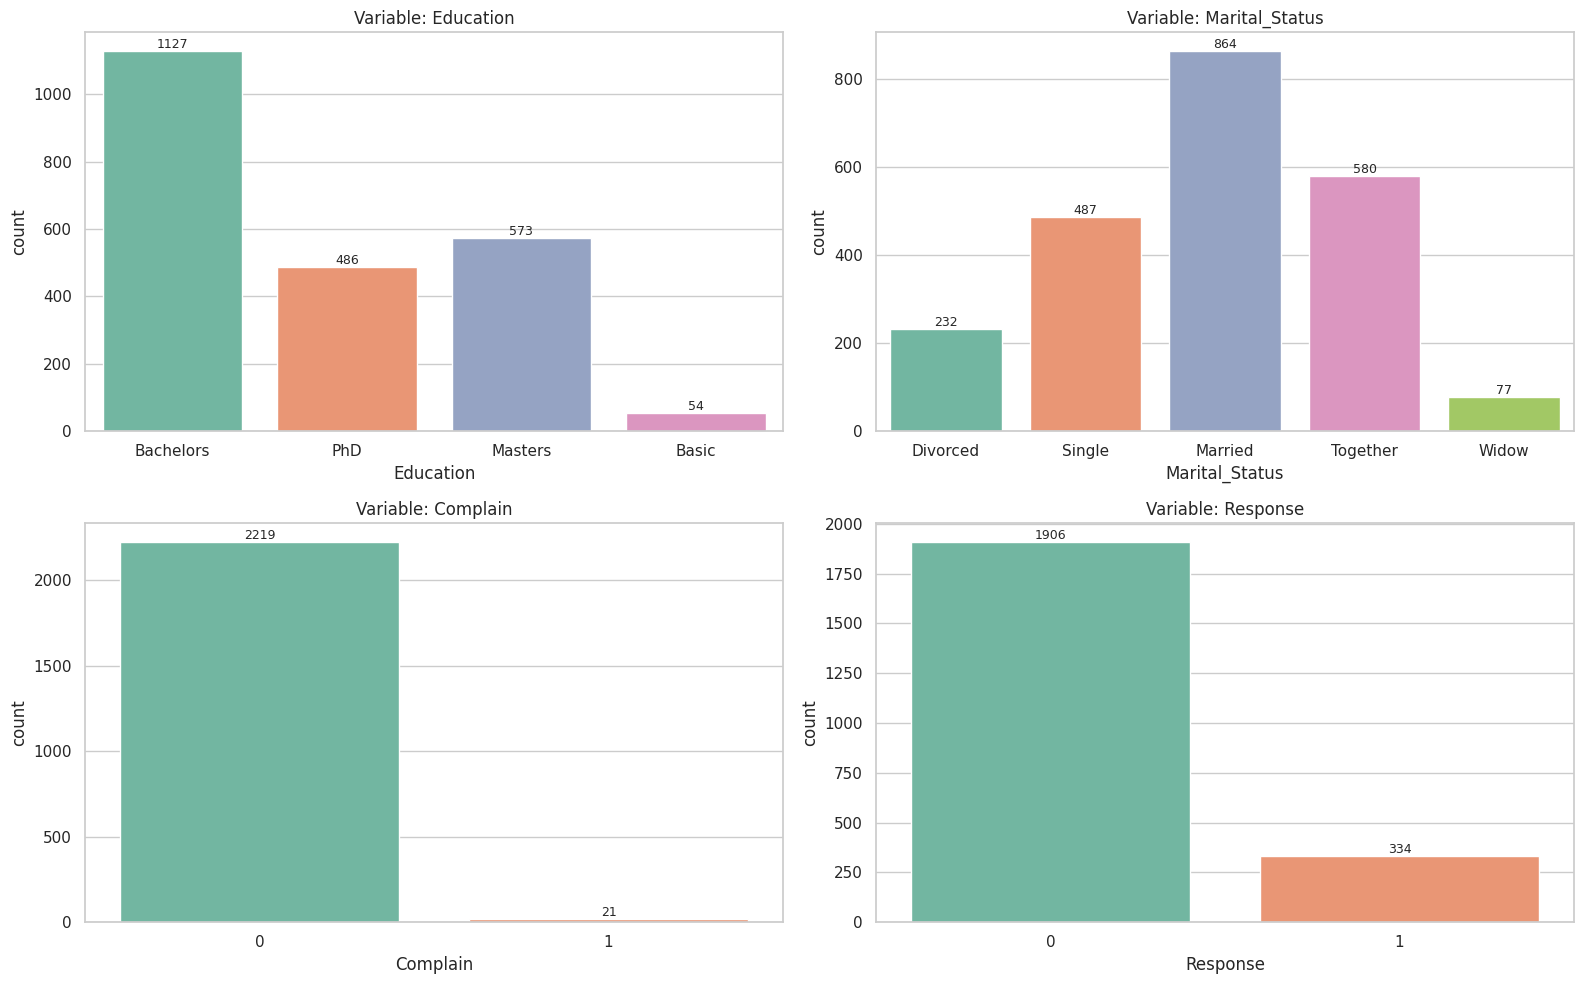

In [ ]:
# List of categorical columns
categorical_columns = [
    'Education',
    'Marital_Status',
    'Complain',
    'Response'
]

# Subplot grid settings
n_cols = 2
n_rows = math.ceil(len(categorical_columns) / n_cols)

# Set figure size based on number of subplots
plt.figure(figsize=(8 * n_cols, 5 * n_rows))

# Loop and plot
for idx, col in enumerate(categorical_columns, start=1):
    plt.subplot(n_rows, n_cols, idx)
    ax = sns.countplot(x=col, hue=col, data=cleaned_df, palette='Set2', legend=False)
    plt.title(f'Variable: {col}')

    # Add text labels above each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.1,
            int(height),
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.tight_layout()
plt.show()

### Discrete Numeric Variables (Small Integer Ranges)

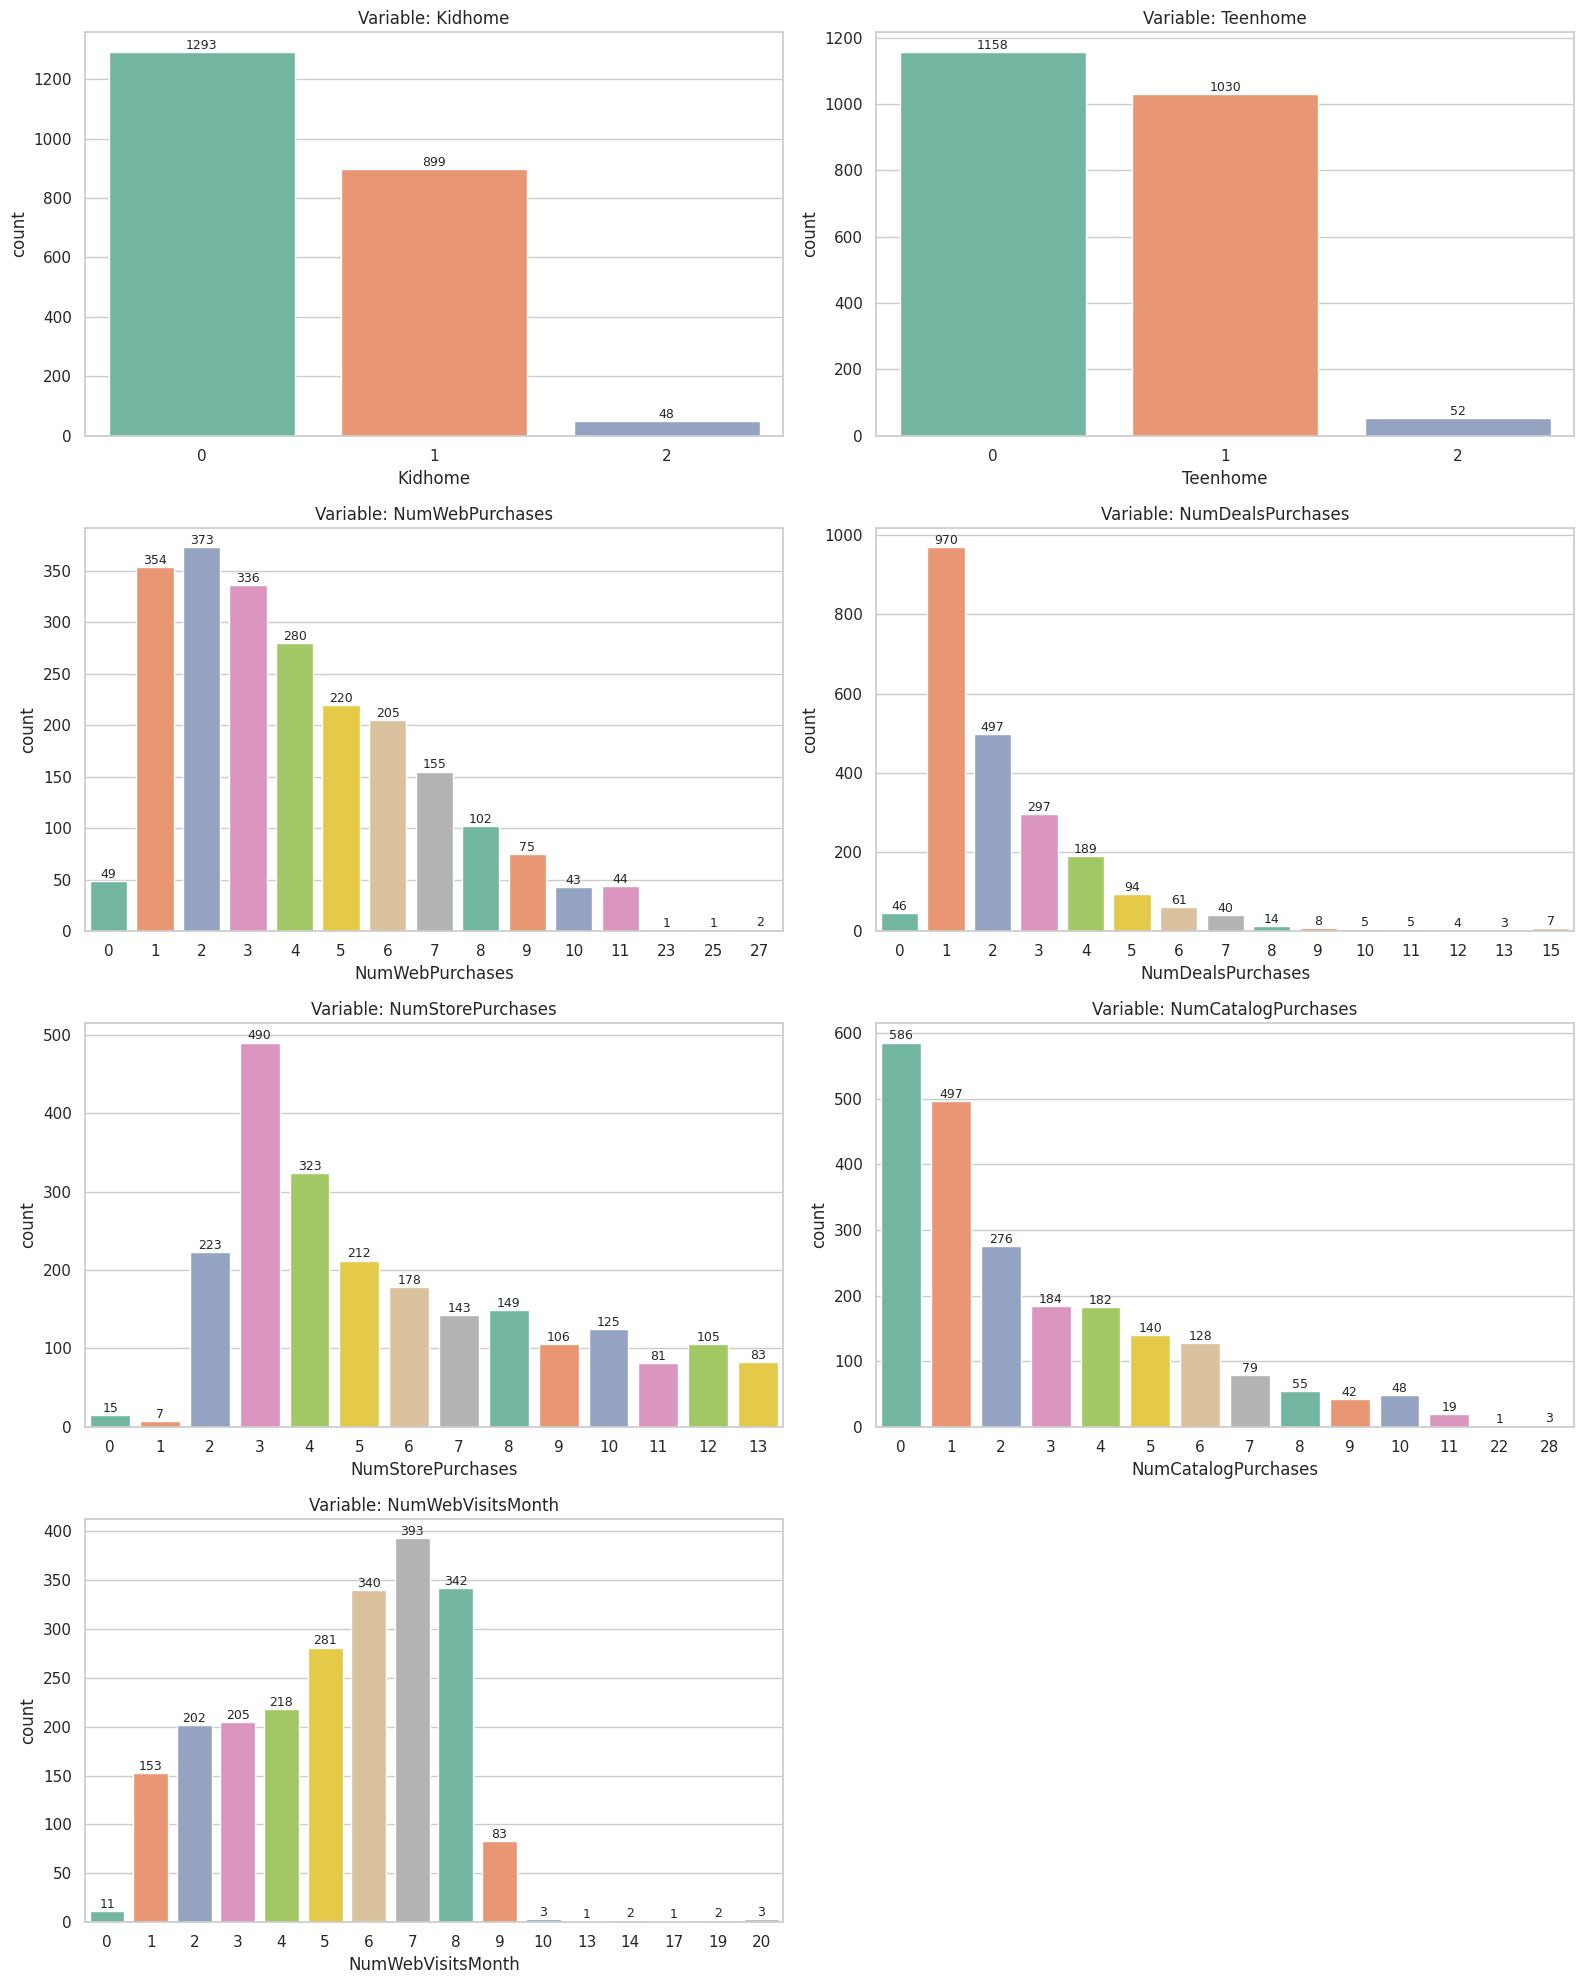

In [ ]:
# List of discrete columns
discrete_columns = [
    'Kidhome',
    'Teenhome',
    'NumWebPurchases',
    'NumDealsPurchases',
    'NumStorePurchases',
    'NumCatalogPurchases',
    'NumWebVisitsMonth'
]

# Subplot grid settings
n_cols = 2
n_rows = math.ceil(len(discrete_columns) / n_cols)

# Set figure size based on number of subplots
plt.figure(figsize=(8 * n_cols, 5 * n_rows))

# Loop and plot
for idx, col in enumerate(discrete_columns, start=1):
    plt.subplot(n_rows, n_cols, idx)
    ax = sns.countplot(x=col, hue=col, data=cleaned_df, palette='Set2', legend=False)
    plt.title(f'Variable: {col}')

    # Add text labels above each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.1,
            int(height),
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.tight_layout()
plt.show()

### Continuous Numeric Variables (Larger Ranges)

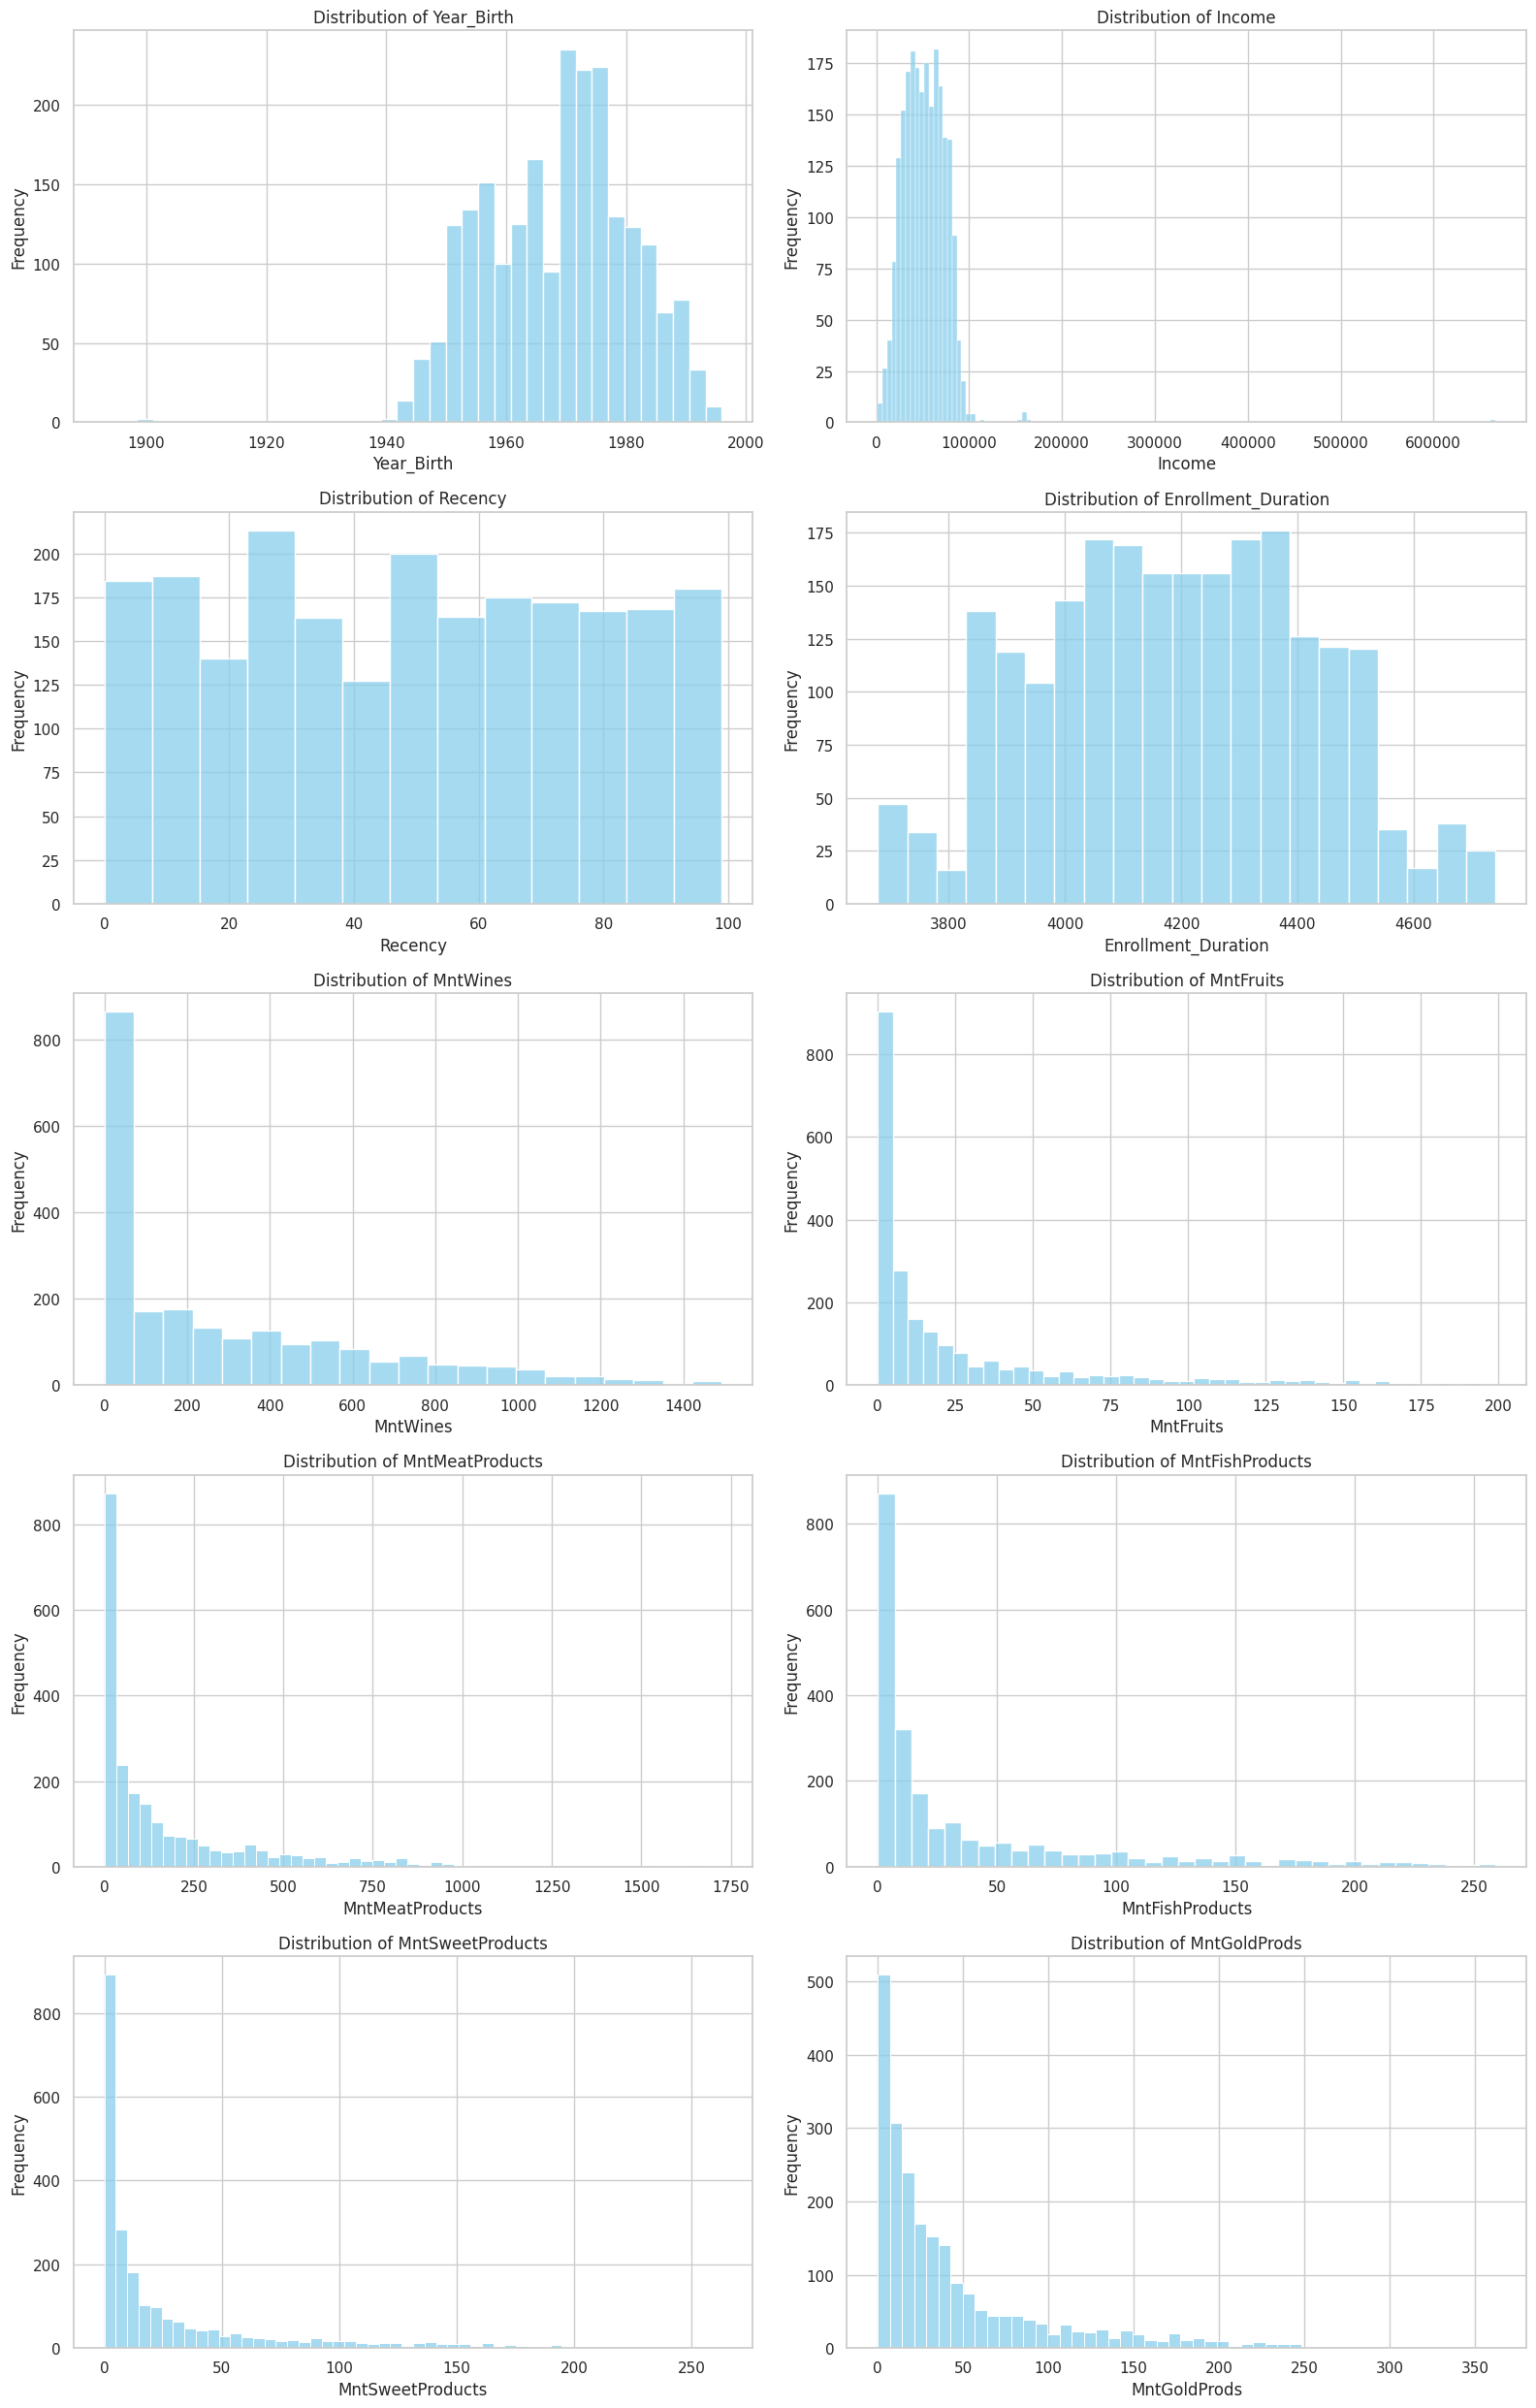

In [ ]:
# List of continuous columns
continuous_columns = [
    'Year_Birth',
    'Income',
    'Recency',
    'Enrollment_Duration',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

# Grid settings
n_cols = 2
n_rows = math.ceil(len(continuous_columns) / n_cols)

plt.figure(figsize=(8 * n_cols, 5 * n_rows))
sns.set(style='whitegrid', color_codes=True)

# Loop through each variable and plot
for idx, col in enumerate(continuous_columns, start=1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(cleaned_df[col], kde=False, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### All Numerical Variables

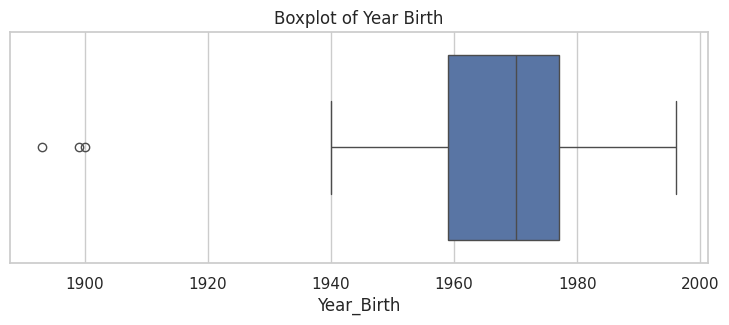

In [ ]:
# Boxplot for Year_Birth
plt.figure(figsize=(9, 3))
sns.boxplot(x=cleaned_df['Year_Birth'])
plt.title('Boxplot of Year Birth')
plt.show()

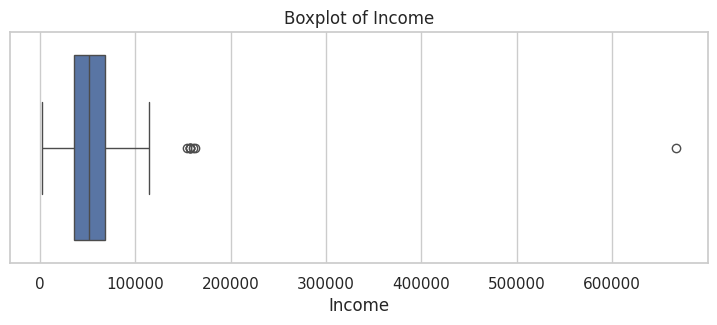

In [ ]:
# Boxplot for Income
plt.figure(figsize=(9, 3))
sns.boxplot(x=cleaned_df['Income'])
plt.title('Boxplot of Income')
plt.show()

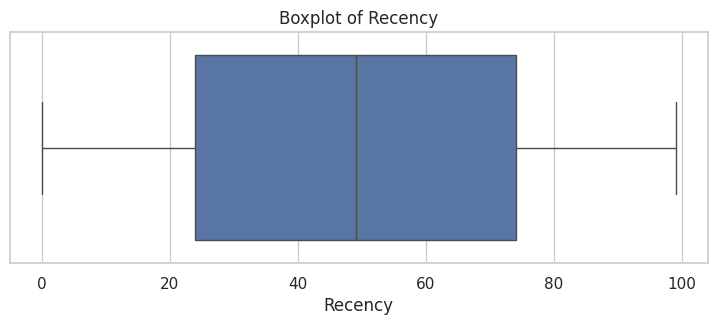

In [ ]:
# Boxplot for Recency
plt.figure(figsize=(9, 3))
sns.boxplot(x=cleaned_df['Recency'])
plt.title('Boxplot of Recency')
plt.show()

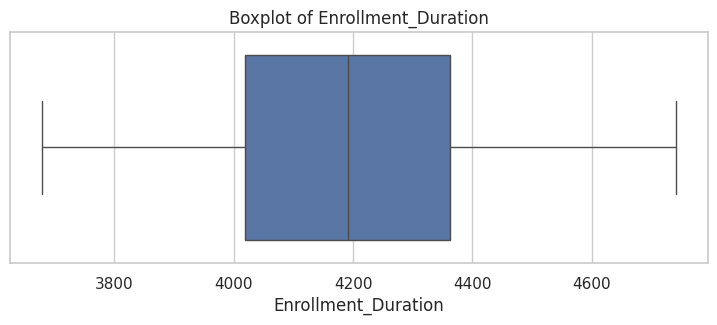

In [ ]:
# Boxplot for Enrollment Duration
plt.figure(figsize=(9, 3))
sns.boxplot(x=cleaned_df['Enrollment_Duration'])
plt.title('Boxplot of Enrollment_Duration')
plt.show()

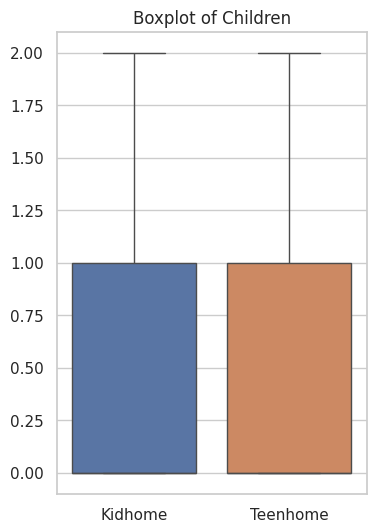

In [ ]:
# Boxplot for Children
children = ['Kidhome', 'Teenhome']

plt.figure(figsize=(4, 6))
sns.boxplot(data=cleaned_df[children])
plt.title('Boxplot of Children')
plt.show()

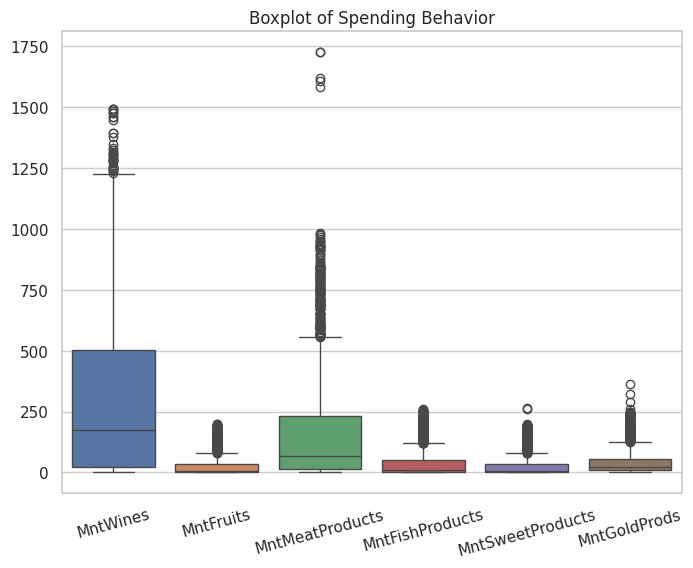

In [ ]:
# Boxplot for Spending Behavior
spending_behavior = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_df[spending_behavior])
plt.xticks(rotation=15)
plt.title('Boxplot of Spending Behavior')
plt.show()

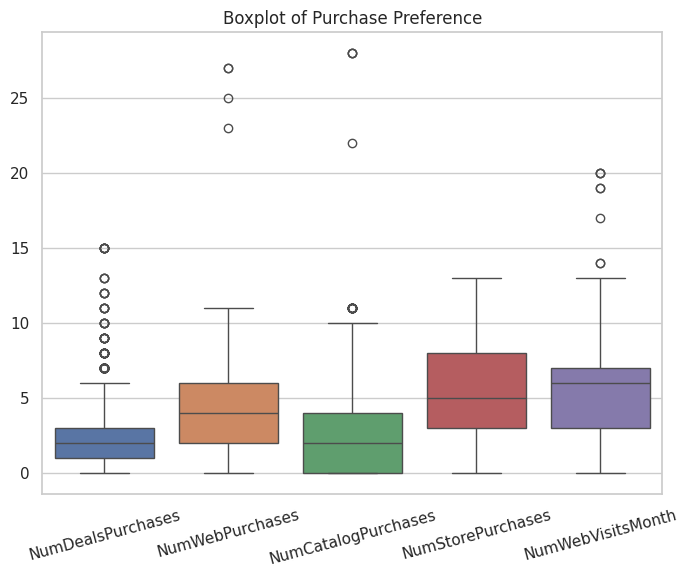

In [ ]:
# Boxplot for Purchase Preference
purchase_preferences = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_df[purchase_preferences])
plt.xticks(rotation=15)
plt.title('Boxplot of Purchase Preference')
plt.show()

## Label Distribution

This reviews the frequency of each class in the target variable, Response, to check for class imbalance.

- A significant difference in the number of positive (1) and negative (0) responses can impact model performance.

- Identifying this early helps determine whether techniques like resampling may be needed during modeling.

In [ ]:
label_counts = df['Response'].value_counts().reset_index()
label_counts

,Response,count
0,0,1906
1,1,334


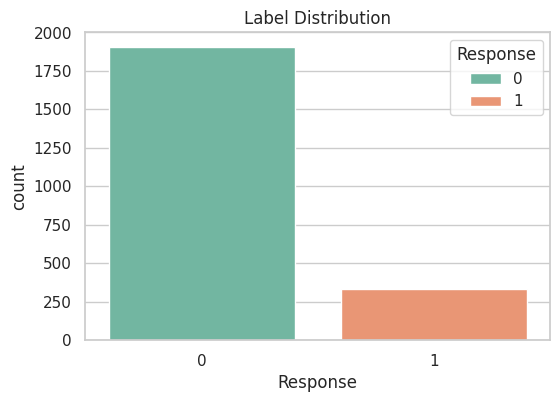

In [ ]:
# Plot the label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Response', hue='Response', data=cleaned_df, palette='Set2')
plt.title('Label Distribution')
plt.show()

## Encoding Categorical Data

**One-hot encoding** is typically part of preprocessing, but in this case, it is done early for the `Marital_Status` and `Education` columns to support correlation analysis, which requires numerical values for all features.

In [ ]:
cleaned_df = pd.get_dummies(cleaned_df, drop_first=True)

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   int64  
 1   Income                   2240 non-null   float64
 2   Kidhome                  2240 non-null   int64  
 3   Teenhome                 2240 non-null   int64  
 4   Enrollment_Duration      2240 non-null   int64  
 5   Recency                  2240 non-null   int64  
 6   MntWines                 2240 non-null   int64  
 7   MntFruits                2240 non-null   int64  
 8   MntMeatProducts          2240 non-null   int64  
 9   MntFishProducts          2240 non-null   int64  
 10  MntSweetProducts         2240 non-null   int64  
 11  MntGoldProds             2240 non-null   int64  
 12  NumDealsPurchases        2240 non-null   int64  
 13  NumWebPurchases          2240 non-null   int64  
 14  NumCatalogPurchases     

In [ ]:
cleaned_df.head()

,Year_Birth,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Education_Basic,Education_Masters,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1970,84835.0,0,0,3851,0,189,104,379,111,189,218,1,4,4,6,1,1,0,False,False,False,False,False,False,False
1,1961,57091.0,0,0,3852,0,464,5,64,7,0,37,1,7,3,7,5,1,0,False,False,False,False,True,False,False
2,1958,67267.0,0,1,3885,0,134,11,59,15,2,30,1,3,2,5,2,0,0,False,False,False,True,False,False,False
3,1967,32474.0,1,1,3709,0,10,0,1,0,0,0,1,1,0,2,7,0,0,False,False,False,False,False,True,False
4,1989,21474.0,1,0,3802,0,6,16,24,11,0,34,2,3,1,2,7,1,0,False,False,False,False,True,False,False


## Correlation Analysis

This measures the strength and direction of relationships between numerical features and the target variable. It helps identify influential predictors and detect multicollinearity, using a correlation matrix for visualization.

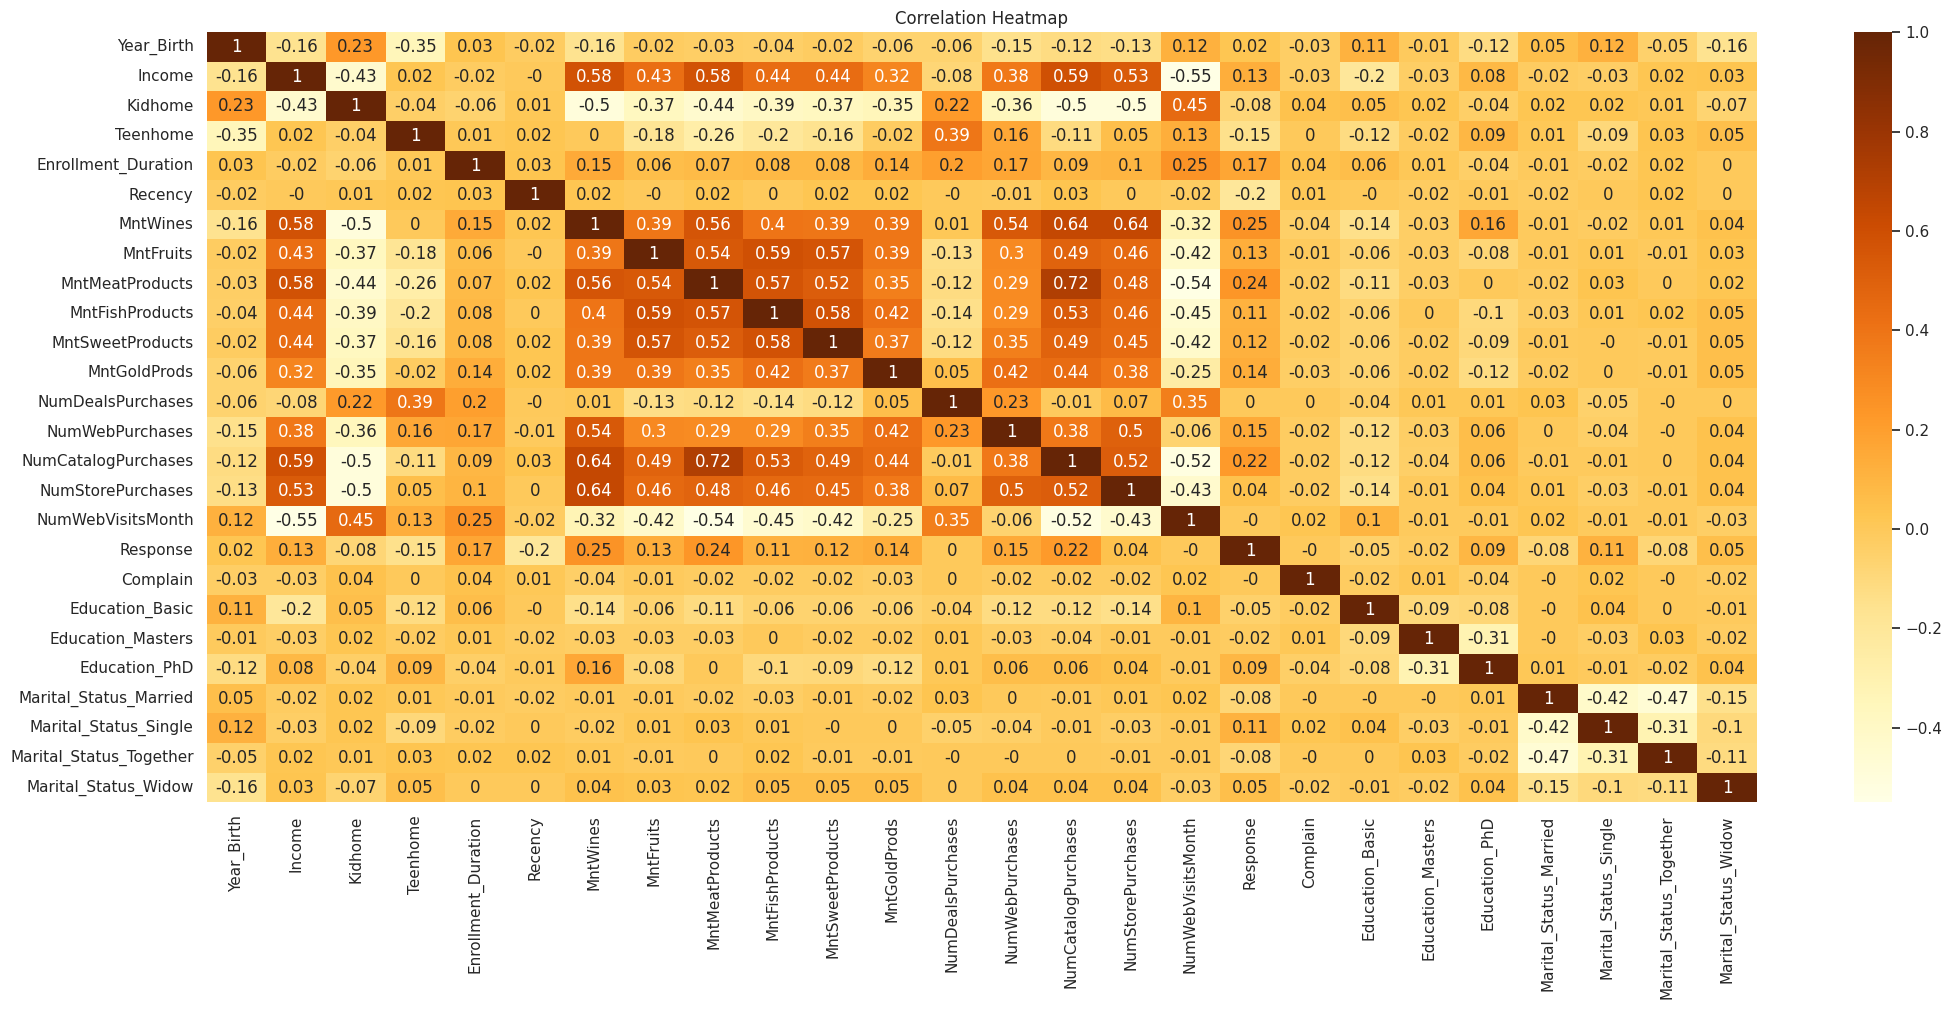

In [ ]:
# Calculate correlation on the numeric data
correlation = cleaned_df.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(correlation, annot=True, cmap='YlOrBr')
plt.title('Correlation Heatmap')
plt.show()

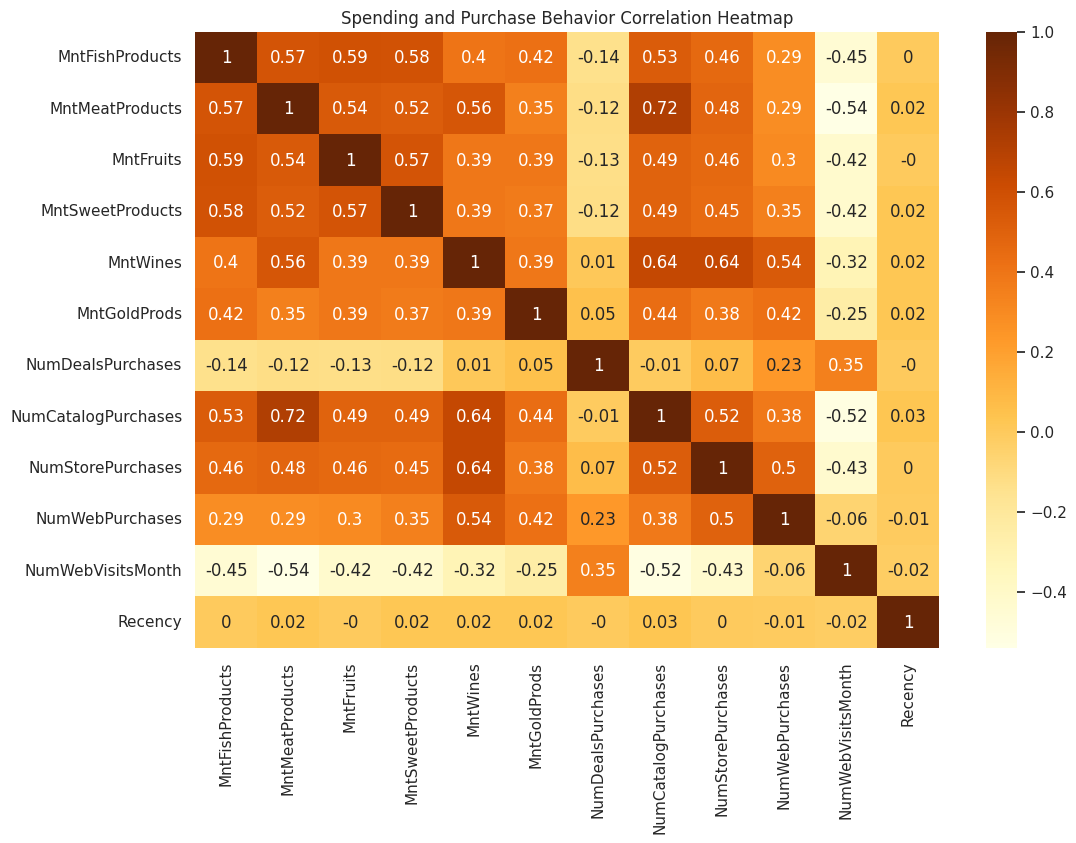

In [ ]:
# List of spending and purchase behavior variables
behavior_columns = [
    'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts',
    'MntWines', 'MntGoldProds',
    'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebPurchases', 'NumWebVisitsMonth', 'Recency'
]

# Compute correlation matrix for selected features
correlation = cleaned_df[behavior_columns].corr().round(2)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='YlOrBr')
plt.title('Spending and Purchase Behavior Correlation Heatmap')
plt.show()

# **Preprocessing the Dataset**

In addtion to cleaning, this serves as preparation for modeling. It involves transforming and organizing the data to ensure it is in the proper format for machine learning algorithms.

In [ ]:
preprocessed_df = cleaned_df.copy()

## Dropping Highly Correlated Column (NumCatalogPurchases)

In [ ]:
preprocessed_df = preprocessed_df.drop(columns=["NumCatalogPurchases"])

In [ ]:
preprocessed_df

,Year_Birth,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Education_Basic,Education_Masters,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1970,84835.0,0,0,3851,0,189,104,379,111,189,218,1,4,6,1,1,0,False,False,False,False,False,False,False
1,1961,57091.0,0,0,3852,0,464,5,64,7,0,37,1,7,7,5,1,0,False,False,False,False,True,False,False
2,1958,67267.0,0,1,3885,0,134,11,59,15,2,30,1,3,5,2,0,0,False,False,False,True,False,False,False
3,1967,32474.0,1,1,3709,0,10,0,1,0,0,0,1,1,2,7,0,0,False,False,False,False,False,True,False
4,1989,21474.0,1,0,3802,0,6,16,24,11,0,34,2,3,2,7,1,0,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,66476.0,0,1,4199,99,372,18,126,47,48,78,2,5,11,4,0,0,False,False,True,False,False,False,False
2236,1977,31056.0,1,0,4361,99,5,10,13,3,8,16,1,1,3,8,0,0,False,True,False,True,False,False,False
2237,1976,46310.0,1,0,4677,99,185,2,88,15,5,14,2,6,5,8,0,0,False,False,False,False,False,False,False
2238,1978,65819.0,0,0,4415,99,267,38,701,149,165,63,1,5,10,3,0,0,False,False,False,True,False,False,False


In [ ]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   int64  
 1   Income                   2240 non-null   float64
 2   Kidhome                  2240 non-null   int64  
 3   Teenhome                 2240 non-null   int64  
 4   Enrollment_Duration      2240 non-null   int64  
 5   Recency                  2240 non-null   int64  
 6   MntWines                 2240 non-null   int64  
 7   MntFruits                2240 non-null   int64  
 8   MntMeatProducts          2240 non-null   int64  
 9   MntFishProducts          2240 non-null   int64  
 10  MntSweetProducts         2240 non-null   int64  
 11  MntGoldProds             2240 non-null   int64  
 12  NumDealsPurchases        2240 non-null   int64  
 13  NumWebPurchases          2240 non-null   int64  
 14  NumStorePurchases       

## Handling Outliers

This involves identifying and addressing extreme values that deviate significantly from the rest of the data. These outliers can distort statistical analyses and negatively impact model performance, so they are either removed or capped based on predefined thresholds.

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

This function above, `remove_outliers_iqr`, removes outliers from a specified column using the Interquartile Range (IQR) method.


### Removing Outliers from All Relevant Columns (Version 1)

This applies the IQR method to remove outliers from all columns identified as having significant outliers based on the boxplots in the distribution analysis. This aggressive filtering reduced the dataset size from **2,240 to 982 rows**, keeping only records within the acceptable value ranges across all selected columns.

In [ ]:
# Define full list of columns with potential outliers
all_columns_with_outliers = [
    'Year_Birth',
    'Income',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    # 'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth'
]

# Create separate copy for version 1
preprocessed_df_v1 = preprocessed_df.copy()

# Remove outliers for version 1
for col in all_columns_with_outliers:
    preprocessed_df_v1 = remove_outliers_iqr(preprocessed_df_v1, col)

In [ ]:
preprocessed_df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 2 to 2237
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               999 non-null    int64  
 1   Income                   999 non-null    float64
 2   Kidhome                  999 non-null    int64  
 3   Teenhome                 999 non-null    int64  
 4   Enrollment_Duration      999 non-null    int64  
 5   Recency                  999 non-null    int64  
 6   MntWines                 999 non-null    int64  
 7   MntFruits                999 non-null    int64  
 8   MntMeatProducts          999 non-null    int64  
 9   MntFishProducts          999 non-null    int64  
 10  MntSweetProducts         999 non-null    int64  
 11  MntGoldProds             999 non-null    int64  
 12  NumDealsPurchases        999 non-null    int64  
 13  NumWebPurchases          999 non-null    int64  
 14  NumStorePurchases        999 n

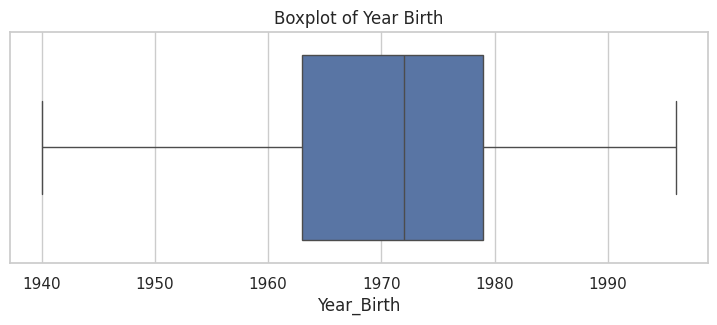

In [ ]:
# Boxplot for Year_Birth
plt.figure(figsize=(9, 3))
sns.boxplot(x=preprocessed_df_v1['Year_Birth'])
plt.title('Boxplot of Year Birth')
plt.show()

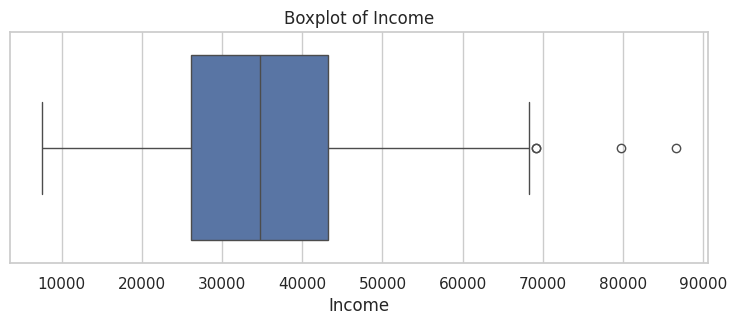

In [ ]:
# Boxplot for Income
plt.figure(figsize=(9, 3))
sns.boxplot(x=preprocessed_df_v1['Income'])
plt.title('Boxplot of Income')
plt.show()

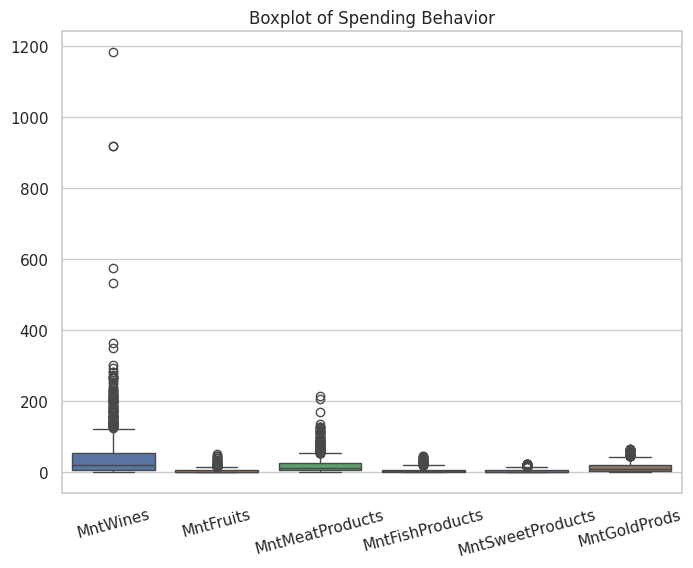

In [ ]:
# Boxplot for Spending Behavior
spending_behavior = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(8, 6))
sns.boxplot(data=preprocessed_df_v1[spending_behavior])
plt.xticks(rotation=15)
plt.title('Boxplot of Spending Behavior')
plt.show()

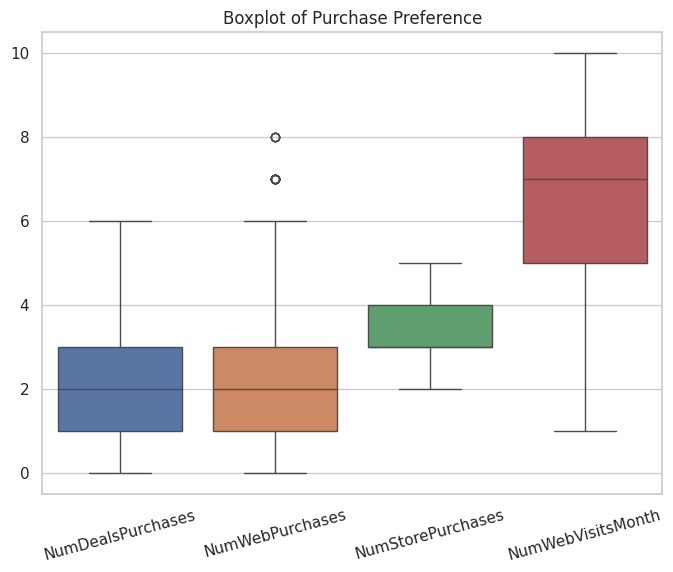

In [ ]:
# Boxplot for Purchase Preference
purchase_preferences = ['NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(8, 6))
sns.boxplot(data=preprocessed_df_v1[purchase_preferences])
plt.xticks(rotation=15)
plt.title('Boxplot of Purchase Preference')
plt.show()

### Removing Outliers from Year_Birth and Income Only (Version 2)

Because of that, this section applies outlier removal solely to the Year_Birth and Income columns, which showed rare or unrealistic values in the distribution analysis. This more conservative approach reduced the dataset only slightly—from **2,240 to 2,229 rows**—preserving most of the data while addressing key anomalies.

In [ ]:
# Subset for version 2
partial_columns_with_outliers = ['Year_Birth', 'Income']

# Create separate copy for version 2
preprocessed_df_v2 = cleaned_df.copy()

# Remove outliers for version 2 (only Year_Birth and Income)
for col in partial_columns_with_outliers:
    preprocessed_df_v2 = remove_outliers_iqr(preprocessed_df_v2, col)

In [ ]:
preprocessed_df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2229 non-null   int64  
 1   Income                   2229 non-null   float64
 2   Kidhome                  2229 non-null   int64  
 3   Teenhome                 2229 non-null   int64  
 4   Enrollment_Duration      2229 non-null   int64  
 5   Recency                  2229 non-null   int64  
 6   MntWines                 2229 non-null   int64  
 7   MntFruits                2229 non-null   int64  
 8   MntMeatProducts          2229 non-null   int64  
 9   MntFishProducts          2229 non-null   int64  
 10  MntSweetProducts         2229 non-null   int64  
 11  MntGoldProds             2229 non-null   int64  
 12  NumDealsPurchases        2229 non-null   int64  
 13  NumWebPurchases          2229 non-null   int64  
 14  NumCatalogPurchases      2229

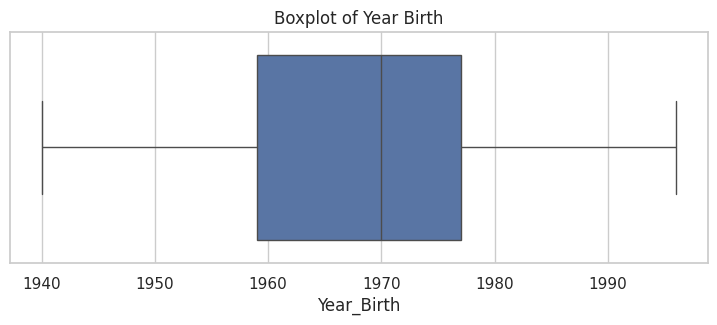

In [ ]:
# Boxplot for Year_Birth
plt.figure(figsize=(9, 3))
sns.boxplot(x=preprocessed_df_v2['Year_Birth'])
plt.title('Boxplot of Year Birth')
plt.show()

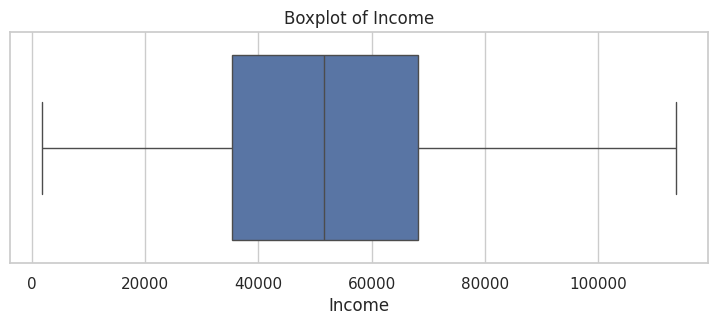

In [ ]:
# Boxplot for Income
plt.figure(figsize=(9, 3))
sns.boxplot(x=preprocessed_df_v2['Income'])
plt.title('Boxplot of Income')
plt.show()

## Balancing the Dataset

### Feature and Target Split

In [ ]:
# Separate features and target for Version 1
X_v1 = preprocessed_df_v1.drop('Response', axis=1)
y_v1 = preprocessed_df_v1['Response']

In [ ]:
X_v1

,Year_Birth,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Basic,Education_Masters,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
2,1958,67267.0,0,1,3885,0,134,11,59,15,2,30,1,3,5,2,0,False,False,False,True,False,False,False
3,1967,32474.0,1,1,3709,0,10,0,1,0,0,0,1,1,2,7,0,False,False,False,False,False,True,False
4,1989,21474.0,1,0,3802,0,6,16,24,11,0,34,2,3,2,7,0,False,False,False,False,True,False,False
7,1967,44931.0,0,1,4000,0,78,0,11,0,0,7,1,2,3,5,0,False,False,False,False,False,True,False
13,1981,26872.0,0,0,4094,0,3,10,8,3,16,32,1,1,2,6,0,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,1974,20130.0,0,0,3942,99,0,6,3,7,6,12,1,1,3,8,0,False,True,False,True,False,False,False
2231,1973,42429.0,0,1,3712,99,55,0,6,2,0,4,2,1,3,5,0,False,False,False,False,False,False,True
2232,1973,42429.0,0,1,3712,99,55,0,6,2,0,4,2,1,3,5,0,False,False,False,False,False,False,True
2236,1977,31056.0,1,0,4361,99,5,10,13,3,8,16,1,1,3,8,0,False,True,False,True,False,False,False


In [ ]:
y_v1

,Response
2,0
3,0
4,1
7,0
13,0
...,...
2230,0
2231,0
2232,0
2236,0


In [ ]:
# Separate features and target for Version 2
X_v2 = preprocessed_df_v2.drop('Response', axis=1)
y_v2 = preprocessed_df_v2['Response']

In [ ]:
X_v2

,Year_Birth,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Basic,Education_Masters,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1970,84835.0,0,0,3851,0,189,104,379,111,189,218,1,4,4,6,1,0,False,False,False,False,False,False,False
1,1961,57091.0,0,0,3852,0,464,5,64,7,0,37,1,7,3,7,5,0,False,False,False,False,True,False,False
2,1958,67267.0,0,1,3885,0,134,11,59,15,2,30,1,3,2,5,2,0,False,False,False,True,False,False,False
3,1967,32474.0,1,1,3709,0,10,0,1,0,0,0,1,1,0,2,7,0,False,False,False,False,False,True,False
4,1989,21474.0,1,0,3802,0,6,16,24,11,0,34,2,3,1,2,7,0,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,66476.0,0,1,4199,99,372,18,126,47,48,78,2,5,2,11,4,0,False,False,True,False,False,False,False
2236,1977,31056.0,1,0,4361,99,5,10,13,3,8,16,1,1,0,3,8,0,False,True,False,True,False,False,False
2237,1976,46310.0,1,0,4677,99,185,2,88,15,5,14,2,6,1,5,8,0,False,False,False,False,False,False,False
2238,1978,65819.0,0,0,4415,99,267,38,701,149,165,63,1,5,4,10,3,0,False,False,False,True,False,False,False


In [ ]:
y_v2

,Response
0,1
1,1
2,0
3,0
4,1
...,...
2235,0
2236,0
2237,0
2238,0


### Performing SMOTE

In [ ]:
# Apply SMOTE to the scaled training data for Version 1
smote_v1 = SMOTE(random_state=42)
X_v1_balanced, y_v1_balanced = smote_v1.fit_resample(X_v1, y_v1)

In [ ]:
y_v1_balanced.value_counts()

,count
Response,
0,909
1,909


In [ ]:
X_v1_balanced.nunique()

,0
Year_Birth,52
Income,1665
Kidhome,3
Teenhome,3
Enrollment_Duration,705
Recency,100
MntWines,230
MntFruits,41
MntMeatProducts,121
MntFishProducts,43


In [ ]:
y_v1_balanced

,Response
0,0
1,0
2,1
3,0
4,0
...,...
1813,1
1814,1
1815,1
1816,1


In [ ]:
X_v1_balanced

,Year_Birth,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Basic,Education_Masters,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1958,67267.000000,0,1,3885,0,134,11,59,15,2,30,1,3,5,2,0,False,False,False,True,False,False,False
1,1967,32474.000000,1,1,3709,0,10,0,1,0,0,0,1,1,2,7,0,False,False,False,False,False,True,False
2,1989,21474.000000,1,0,3802,0,6,16,24,11,0,34,2,3,2,7,0,False,False,False,False,True,False,False
3,1967,44931.000000,0,1,4000,0,78,0,11,0,0,7,1,2,3,5,0,False,False,False,False,False,True,False
4,1981,26872.000000,0,0,4094,0,3,10,8,3,16,32,1,1,2,6,0,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,1968,32460.299998,1,0,4016,16,31,2,27,0,3,9,2,1,2,5,0,False,True,False,False,True,False,False
1814,1986,21387.485425,0,0,3882,2,5,15,21,10,2,33,1,3,2,7,0,False,True,False,False,True,True,False
1815,1972,35781.641504,1,0,3989,27,32,1,29,5,4,22,2,1,2,5,0,False,True,True,True,True,False,False
1816,1954,50698.347237,0,0,4497,36,827,18,100,12,9,33,2,4,4,7,0,False,False,True,True,True,False,False


In [ ]:
# Apply SMOTE to the scaled training data for Version 2
smote_v2 = SMOTE(random_state=42)
X_v2_balanced, y_v2_balanced = smote_v2.fit_resample(X_v2, y_v2)

In [ ]:
y_v2_balanced.value_counts()

,count
Response,
1,1895
0,1895


In [ ]:
X_v2_balanced.nunique()

,0
Year_Birth,56
Income,3469
Kidhome,3
Teenhome,3
Enrollment_Duration,821
Recency,100
MntWines,1102
MntFruits,181
MntMeatProducts,802
MntFishProducts,235


In [ ]:
y_v2_balanced

,Response
0,1
1,1
2,0
3,0
4,1
...,...
3785,1
3786,1
3787,1
3788,1


In [ ]:
X_v2_balanced

,Year_Birth,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Basic,Education_Masters,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1970,84835.000000,0,0,3851,0,189,104,379,111,189,218,1,4,4,6,1,0,False,False,False,False,False,False,False
1,1961,57091.000000,0,0,3852,0,464,5,64,7,0,37,1,7,3,7,5,0,False,False,False,False,True,False,False
2,1958,67267.000000,0,1,3885,0,134,11,59,15,2,30,1,3,2,5,2,0,False,False,False,True,False,False,False
3,1967,32474.000000,1,1,3709,0,10,0,1,0,0,0,1,1,0,2,7,0,False,False,False,False,False,True,False
4,1989,21474.000000,1,0,3802,0,6,16,24,11,0,34,2,3,1,2,7,0,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,1950,62882.901234,0,1,4721,13,864,4,45,5,0,81,8,4,4,7,7,0,False,True,False,True,False,False,False
3786,1982,81262.683603,0,0,4049,18,310,60,487,30,55,68,1,4,8,12,2,0,False,False,False,True,False,False,False
3787,1980,19923.388886,0,0,4057,9,11,3,18,3,5,16,2,3,1,2,7,0,False,True,False,False,False,True,False
3788,1992,95436.822877,0,0,4536,21,901,26,777,213,25,22,1,6,3,6,2,0,False,False,True,False,True,False,False


## Scaling Features

In [ ]:
# Initialize a scaler for Version 1
scaler_v1 = StandardScaler()
scaler_v1.set_output(transform='pandas')

# Fit and transform on features only
X_v1_scaled = scaler_v1.fit_transform(X_v1_balanced)

In [ ]:
X_v1_scaled

,Year_Birth,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Basic,Education_Masters,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,-1.356407,2.931163,-1.603577,1.438708,-1.475066,-1.462335,0.790823,0.890053,1.306205,1.296199,-0.534783,0.993267,-0.946246,0.569125,2.382229,-3.362707,-0.074371,-0.215945,-0.798648,-0.624426,1.211097,-0.763953,-0.652597,-0.230873
1,-0.462660,-0.114736,0.507432,1.438708,-2.263038,-1.462335,-0.419450,-0.804955,-1.046731,-0.906540,-0.912350,-1.355535,-0.946246,-0.933662,-0.962950,0.155190,-0.074371,-0.215945,-0.798648,-0.624426,-0.825697,-0.763953,1.532340,-0.230873
2,1.722056,-1.077714,0.507432,-0.642096,-1.846666,-1.462335,-0.458491,1.660512,-0.113670,0.708802,-0.912350,1.306440,-0.043688,0.569125,-0.962950,0.155190,-0.074371,-0.215945,-0.798648,-0.624426,-0.825697,1.308982,-0.652597,-0.230873
3,-0.462660,0.975792,-1.603577,1.438708,-0.960198,-1.462335,0.244248,-0.804955,-0.641053,-0.906540,-0.912350,-0.807481,-0.946246,-0.182269,0.152109,-1.251969,-0.074371,-0.215945,-0.798648,-0.624426,-0.825697,-0.763953,1.532340,-0.230873
4,0.927614,-0.605155,-1.603577,-0.642096,-0.539349,-1.462335,-0.487772,0.735962,-0.762756,-0.465992,2.108188,1.149853,-0.946246,-0.933662,-0.962950,-0.548389,-0.074371,-0.215945,-0.798648,-0.624426,1.211097,-0.763953,-0.652597,-0.230873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,-0.363355,-0.115936,0.507432,-0.642096,-0.888564,-0.870079,-0.214484,-0.496772,0.008033,-0.906540,-0.345999,-0.650895,-0.043688,-0.933662,-0.962950,-1.251969,-0.074371,-0.215945,1.252117,-0.624426,-0.825697,1.308982,-0.652597,-0.230873
1814,1.424140,-1.085288,-1.603577,-0.642096,-1.488497,-1.388303,-0.468251,1.506420,-0.235374,0.561953,-0.534783,1.228147,-0.946246,0.569125,-0.962950,0.155190,-0.074371,-0.215945,1.252117,-0.624426,-0.825697,1.308982,1.532340,-0.230873
1815,0.033866,0.174826,0.507432,-0.642096,-1.009446,-0.462903,-0.204724,-0.650864,0.089169,-0.172293,-0.157216,0.366919,-0.043688,-0.933662,-0.962950,-1.251969,-0.074371,-0.215945,1.252117,1.601470,1.211097,1.308982,-0.652597,-0.230873
1816,-1.753629,1.480686,-1.603577,-0.642096,1.264927,-0.129760,7.554688,1.968695,2.969487,0.855651,0.786702,1.228147,-0.043688,1.320518,1.267169,0.155190,-0.074371,-0.215945,-0.798648,1.601470,1.211097,1.308982,-0.652597,-0.230873


In [ ]:
# Initialize a new scaler for Version 2
scaler_v2 = StandardScaler()
scaler_v2.set_output(transform='pandas')

# Fit and transform on features only
X_v2_scaled = scaler_v2.fit_transform(X_v2_balanced)

In [ ]:
X_v2_scaled

,Year_Birth,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Basic,Education_Masters,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.094446,1.336348,-0.698776,-0.725084,-1.710667,-1.607889,-0.542813,1.823015,0.632906,1.216111,3.780454,3.262563,-0.656017,-0.146396,0.289202,0.046968,-1.710264,-0.072836,-0.133127,-0.674045,-0.714536,-0.868694,-0.743399,-0.621080,-0.244629
1,-0.705939,0.073755,-0.698776,-0.725084,-1.706170,-1.607889,0.180605,-0.656723,-0.630126,-0.662595,-0.775170,-0.279597,-0.656017,1.020054,-0.058097,0.373588,-0.052489,-0.072836,-0.133127,-0.674045,-0.714536,-0.868694,1.345172,-0.621080,-0.244629
2,-0.972734,0.536852,-0.698776,1.226669,-1.557769,-1.607889,-0.687497,-0.506436,-0.650174,-0.518079,-0.726963,-0.416587,-0.656017,-0.535213,-0.405396,-0.279652,-1.295820,-0.072836,-0.133127,-0.674045,-0.714536,1.151153,-0.743399,-0.621080,-0.244629
3,-0.172349,-1.046532,1.287991,1.226669,-2.349241,-1.607889,-1.013693,-0.781963,-0.882732,-0.789046,-0.775170,-1.003685,-0.656017,-1.312846,-1.099993,-1.259512,0.776399,-0.072836,-0.133127,-0.674045,-0.714536,-0.868694,-0.743399,1.610098,-0.244629
4,1.784148,-1.547127,1.287991,-0.725084,-1.931020,-1.607889,-1.024216,-0.381197,-0.790511,-0.590337,-0.775170,-0.338307,-0.118902,-0.535213,-0.752694,-1.259512,0.776399,-0.072836,-0.133127,-0.674045,-0.714536,-0.868694,1.345172,-0.621080,-0.244629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,-1.684188,0.337337,-0.698776,1.226669,2.201725,-1.129336,1.232850,-0.681771,-0.706308,-0.698724,-0.775170,0.581480,3.103786,-0.146396,0.289202,0.373588,0.776399,-0.072836,-0.133127,1.483581,-0.714536,1.151153,-0.743399,-0.621080,-0.244629
3786,1.161626,1.173777,-0.698776,-0.725084,-0.820260,-0.945277,-0.224509,0.720909,1.065945,-0.247112,0.550540,0.327071,-0.656017,-0.146396,1.678396,2.006687,-1.295820,-0.072836,-0.133127,-0.674045,-0.714536,1.151153,-0.743399,-0.621080,-0.244629
3787,0.983763,-1.617694,-0.698776,-0.725084,-0.784284,-1.276583,-1.011062,-0.706819,-0.814568,-0.734853,-0.654651,-0.690566,-0.118902,-0.535213,-0.752694,-1.259512,0.776399,-0.072836,-0.133127,1.483581,-0.714536,-0.868694,-0.743399,1.610098,-0.244629
3788,2.050943,1.818823,-0.698776,-0.725084,1.369780,-0.834841,1.330183,-0.130718,2.228736,3.058688,-0.172575,-0.573146,-0.656017,0.631237,-0.058097,0.046968,-1.295820,-0.072836,-0.133127,-0.674045,1.399509,-0.868694,1.345172,-0.621080,-0.244629


## Splitting the Dataset

In [ ]:
# Split Version 1 dataset into training and testing sets (stratify to keep class balance)
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1_scaled, y_v1_balanced, test_size=0.2, stratify=y_v1_balanced, random_state=42)

In [ ]:
X_train_v1

,Year_Birth,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Basic,Education_Masters,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
1090,-1.058492,0.665443,0.507432,1.438708,0.011336,-0.388871,-0.038799,-0.034497,0.697687,0.121405,1.164270,1.228147,0.858870,-0.182269,0.152109,0.155190,-0.074371,-0.215945,-0.798648,-0.624426,-0.825697,1.308982,-0.652597,-0.230873
1164,0.629698,-1.253818,0.507432,-0.642096,-1.085557,-0.796047,-0.370649,-0.804955,-0.194806,-0.612841,-0.723567,-0.259428,0.858870,0.569125,-0.962950,0.155190,-0.074371,-0.215945,-0.798648,-0.624426,1.211097,-0.763953,1.532340,-0.230873
1644,-0.065439,0.085193,0.507432,-0.642096,0.414276,-1.166207,0.946987,2.893246,0.819390,-0.025444,-0.534783,-0.181134,0.858870,0.569125,1.267169,0.155190,-0.074371,-0.215945,1.252117,-0.624426,1.211097,-0.763953,1.532340,-0.230873
142,1.722056,-0.306894,0.507432,-0.642096,0.759013,-0.981127,-0.419450,-0.188589,-0.519349,-0.319143,-0.157216,-1.277242,-0.946246,-0.933662,0.152109,0.858769,-0.074371,-0.215945,-0.798648,-0.624426,-0.825697,1.308982,-0.652597,-0.230873
929,-1.356407,-0.638596,-1.603577,-0.642096,1.202248,1.943135,-0.077841,6.437355,1.022230,2.177295,2.863322,0.601800,-0.043688,0.569125,2.382229,-0.548389,-0.074371,-0.215945,1.252117,-0.624426,-0.825697,-0.763953,1.532340,-0.230873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-2.647376,1.032258,-1.603577,-0.642096,-1.542223,-1.129191,0.029522,2.122787,0.089169,-0.612841,1.730620,0.601800,-0.946246,0.569125,0.152109,0.858769,-0.074371,-0.215945,-0.798648,1.601470,-0.825697,1.308982,-0.652597,-0.230873
1264,0.133172,0.258189,0.507432,-0.642096,0.069538,-0.870079,0.761542,0.273687,2.726080,1.149350,0.975486,-0.181134,1.761428,2.071911,0.152109,0.858769,-0.074371,-0.215945,-0.798648,-0.624426,1.211097,-0.763953,-0.652597,-0.230873
1321,0.431088,0.321129,-1.603577,-0.642096,-0.839316,-0.536935,0.537056,-0.496772,-0.113670,-0.465992,-0.345999,-0.729188,-0.946246,-0.182269,0.152109,-0.548389,-0.074371,-0.215945,-0.798648,1.601470,1.211097,1.308982,-0.652597,-0.230873
725,0.828309,1.574152,0.507432,-0.642096,-2.254084,1.276848,0.068563,7.053722,2.442105,-0.025444,2.863322,2.637428,-0.043688,1.320518,1.267169,-1.251969,-0.074371,-0.215945,-0.798648,-0.624426,-0.825697,1.308982,-0.652597,-0.230873


In [ ]:
y_train_v1

,Response
1090,1
1164,1
1644,1
142,0
929,0
...,...
87,1
1264,1
1321,1
725,0


In [ ]:
X_test_v1

,Year_Birth,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Basic,Education_Masters,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
675,-0.661270,-0.897812,-1.603577,1.438708,-0.060298,1.017736,-0.429210,0.273687,-0.559917,-0.465992,-0.534783,0.210333,-0.946246,-0.933662,-0.962950,-0.548389,-0.074371,4.630815,-0.798648,-0.624426,-0.825697,1.308982,-0.652597,-0.230873
815,-1.356407,-0.030344,0.507432,1.438708,-0.431899,1.535959,0.088084,-0.650864,-0.438213,-0.465992,-0.534783,-0.885775,1.761428,-0.182269,1.267169,-1.251969,-0.074371,-0.215945,-0.798648,1.601470,-0.825697,-0.763953,-0.652597,4.331382
1102,1.126225,0.386298,-1.603577,-0.642096,-0.566212,-0.166776,1.317878,-0.496772,2.036426,0.268254,-0.723567,-0.337721,0.858870,1.320518,2.382229,0.155190,-0.074371,-0.215945,-0.798648,1.601470,-0.825697,1.308982,-0.652597,-0.230873
550,0.629698,-0.779366,0.507432,-0.642096,1.260450,0.462496,-0.507292,-0.188589,-0.681620,3.352089,-0.912350,1.463027,-0.946246,-0.933662,-0.962950,-0.548389,-0.074371,4.630815,-0.798648,-0.624426,-0.825697,-0.763953,1.532340,-0.230873
258,-1.654323,1.070689,0.507432,1.438708,-1.340752,-0.536935,-0.146162,-0.804955,-1.006163,-0.906540,-0.912350,-0.885775,-0.946246,-0.933662,0.152109,0.155190,-0.074371,-0.215945,-0.798648,1.601470,-0.825697,-0.763953,1.532340,-0.230873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,-0.859881,0.549221,0.507432,-0.642096,0.888850,0.795640,-0.273046,1.814604,0.292008,0.415104,1.353053,0.288626,-0.043688,-0.182269,1.267169,-0.548389,-0.074371,-0.215945,1.252117,-0.624426,-0.825697,1.308982,1.532340,-0.230873
203,-1.058492,-1.481639,0.507432,1.438708,0.853033,-0.759031,-0.419450,-0.188589,-0.925028,-0.465992,-0.345999,-0.259428,0.858870,-0.933662,0.152109,0.155190,-0.074371,-0.215945,-0.798648,-0.624426,1.211097,-0.763953,-0.652597,-0.230873
895,0.629698,1.102380,0.507432,-0.642096,-0.893041,1.832087,-0.155923,-0.804955,0.778823,-0.319143,-0.345999,-1.355535,-0.946246,-0.182269,0.152109,-1.955548,-0.074371,-0.215945,-0.798648,1.601470,1.211097,-0.763953,-0.652597,-0.230873
1632,0.629698,-0.602804,0.507432,-0.642096,1.041072,-0.684999,-0.458491,0.427778,-0.438213,0.415104,-0.912350,0.445213,-0.946246,-0.933662,-0.962950,1.562349,-0.074371,-0.215945,-0.798648,-0.624426,-0.825697,1.308982,-0.652597,-0.230873


In [ ]:
y_test_v1

,Response
675,0
815,0
1102,1
550,0
258,0
...,...
1795,1
203,0
895,0
1632,1


In [ ]:
# Split Version 2 dataset into training and testing sets (stratify to keep class balance)
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2_scaled, y_v2_balanced, test_size=0.2, stratify=y_v2_balanced, random_state=42)

In [ ]:
X_train_v2

,Year_Birth,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Basic,Education_Masters,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
2331,-0.439144,-0.580308,1.287991,1.226669,0.173577,-1.313395,-0.014060,-0.681771,-0.525875,-0.301305,-0.172575,1.149009,2.566671,0.631237,-0.405396,0.046968,1.190842,-0.072836,-0.133127,-0.674045,-0.714536,-0.868694,1.345172,1.610098,-0.244629
932,1.517353,-1.288320,1.287991,-0.725084,-0.671859,-0.098605,-1.021585,-0.681771,-0.794520,-0.662595,-0.775170,-0.788416,-0.656017,-1.312846,-1.099993,-0.932892,0.776399,-0.072836,-0.133127,1.483581,-0.714536,1.151153,-0.743399,-0.621080,-0.244629
302,0.183378,0.729445,-0.698776,1.226669,-0.109734,-1.166148,0.183236,-0.155766,-0.357471,1.667723,-0.775170,-0.279597,-0.118902,1.408871,-0.058097,2.333307,-0.466933,-0.072836,-0.133127,1.483581,-0.714536,-0.868694,-0.743399,1.610098,-0.244629
1786,-0.705939,-1.238806,-0.698776,-0.725084,-1.706170,1.337055,-1.037369,-0.556532,-0.858674,-0.752917,-0.437717,-0.807986,-0.656017,-0.924030,-1.099993,-0.932892,0.361955,-0.072836,7.511607,-0.674045,-0.714536,1.151153,-0.743399,-0.621080,-0.244629
860,1.517353,-1.530198,1.287991,-0.725084,-0.644877,-0.209041,-1.021585,-0.356149,-0.814568,-0.680659,-0.534132,-0.494867,0.955327,-0.146396,-1.099993,-0.932892,1.190842,-0.072836,-0.133127,-0.674045,-0.714536,-0.868694,-0.743399,-0.621080,-0.244629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1.428421,-1.161942,1.287991,-0.725084,-0.667362,0.306325,-1.032107,-0.706819,-0.858674,-0.789046,-0.726963,-0.788416,-0.118902,-1.312846,-1.099993,-0.932892,0.361955,-0.072836,-0.133127,-0.674045,-0.714536,-0.868694,1.345172,-0.621080,-0.244629
1005,-0.261281,0.379528,-0.698776,1.226669,0.906588,0.048642,1.530109,-0.481388,0.127693,-0.500014,-0.485924,0.972879,0.955327,-0.146396,-0.058097,2.006687,1.190842,-0.072836,-0.133127,-0.674045,-0.714536,-0.868694,1.345172,-0.621080,-0.244629
3293,-2.128846,-0.298851,-0.698776,-0.725084,0.699726,0.159078,0.083272,-0.606628,-0.116894,1.848368,0.309502,-0.181747,-0.118902,1.020054,2.025695,-0.279652,0.361955,-0.072836,-0.133127,-0.674045,1.399509,-0.868694,1.345172,-0.621080,-0.244629
3068,-1.684188,1.150701,-0.698776,-0.725084,-0.334584,-0.982089,0.748817,3.375983,-0.449693,2.643205,0.213087,3.477832,-0.656017,0.242421,2.372994,0.046968,-0.881376,-0.072836,-0.133127,-0.674045,-0.714536,1.151153,-0.743399,-0.621080,-0.244629


In [ ]:
y_train_v2

,Response
2331,1
932,0
302,0
1786,0
860,0
...,...
1173,0
1005,0
3293,1
3068,1


In [ ]:
X_test_v2

,Year_Birth,Income,Kidhome,Teenhome,Enrollment_Duration,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Basic,Education_Masters,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
2887,0.450173,-0.799350,1.287991,-0.725084,1.612618,0.048642,-0.690128,-0.656723,-0.578000,-0.716788,-0.751067,1.579548,0.955327,0.242421,-0.405396,-1.259512,1.190842,-0.072836,-0.133127,-0.674045,1.399509,1.151153,1.345172,-0.621080,-0.244629
3722,1.161626,0.620679,-0.698776,-0.725084,1.180906,-1.239771,1.124995,-0.155766,0.953676,1.450949,-0.076159,0.855460,-0.656017,0.631237,0.983799,0.373588,-0.466933,-0.072836,-0.133127,-0.674045,-0.714536,1.151153,-0.743399,-0.621080,-0.244629
1781,-1.328461,0.969457,-0.698776,-0.725084,0.429906,1.300244,0.317397,0.620718,0.913580,0.764499,0.020256,-0.690566,-0.656017,-0.924030,-0.405396,1.680067,-1.710264,-0.072836,-0.133127,-0.674045,-0.714536,-0.868694,-0.743399,-0.621080,-0.244629
1554,0.361241,0.544361,-0.698776,1.226669,0.286002,0.932125,0.096425,1.196819,0.480540,2.408367,2.502951,2.323205,-0.118902,1.408871,0.636500,-0.606272,-0.466933,-0.072836,-0.133127,-0.674045,-0.714536,1.151153,-0.743399,-0.621080,-0.244629
2732,0.539104,1.701561,-0.698776,-0.725084,-0.150207,-0.061793,0.935591,-0.155766,2.830180,-0.247112,-0.196678,0.385781,-0.656017,0.631237,0.983799,1.026827,-1.295820,-0.072836,-0.133127,-0.674045,1.399509,1.151153,-0.743399,-0.621080,-0.244629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,0.272309,-0.020274,1.287991,1.226669,0.569313,0.011830,-0.500724,-0.731867,-0.586020,-0.662595,-0.510028,-0.573146,0.955327,0.242421,-0.752694,-0.279652,-0.052489,-0.072836,-0.133127,-0.674045,1.399509,1.151153,-0.743399,-0.621080,-0.244629
2275,0.272309,1.717637,-0.698776,-0.725084,-1.013631,-0.540347,1.277571,0.094713,2.577573,0.078049,0.454125,0.385781,-1.193132,0.631237,1.331098,1.026827,-1.295820,-0.072836,-0.133127,-0.674045,-0.714536,1.151153,1.345172,-0.621080,-0.244629
2074,-0.972734,-1.318856,-0.698776,-0.725084,1.131439,1.778797,-0.921622,0.395287,-0.678241,-0.409692,-0.293094,-0.514437,-0.118902,-0.535213,-0.752694,-0.279652,0.361955,-0.072836,-0.133127,1.483581,-0.714536,-0.868694,-0.743399,1.610098,-0.244629
3259,-0.794871,0.582556,-0.698776,-0.725084,1.446229,-0.466723,1.632703,1.873111,0.757204,-0.066467,0.381814,-0.162178,-0.656017,-0.924030,1.678396,2.006687,-0.052489,-0.072836,-0.133127,-0.674045,1.399509,-0.868694,1.345172,-0.621080,-0.244629


In [ ]:
y_test_v2

,Response
2887,1
3722,1
1781,0
1554,0
2732,1
...,...
3474,1
2275,1
2074,0
3259,1


# **Building the Models**

To align with the company's goal of optimizing its marketing strategy, we are building predictive models to predict the probability of a customer accepting the VIP membership offer and identify key factors influencing the decision.

The following models are being used, as they are well-suited to this data mining task:

- Logistic Regression
- Naive Bayes
- K-Nearest Neighbor
- Decision Trees
- Random Forest
- Extra Trees
- AdaBoost
- Gradient Boosting
- Neural Network (MLPClassifier)

In [ ]:
def evaluate_classifier(model, X_test, y_test, model_name='Model'):

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Print metrics
    print(f"\nPerformance Summary: {model_name}")
    print(f"Precision  : {precision:.4f}")
    print(f"Recall     : {recall:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print(f"ROC AUC    : {roc_auc:.4f}")
    print("\n")

    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Confusion matrix plot
    fig, ax = plt.subplots(figsize=(5, 4))
    ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test, cmap='Blues', values_format='d', ax=ax
    )
    plt.title(f'Confusion Matrix')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

The metrics used, along with the confusion matrix, provide a thorough evaluation of model performance:

- **Precision** measures the accuracy of positive predictions.

- **Recall** gauges the model's ability to identify all positive instances.

- **F1 Score** balances precision and recall, useful for class imbalances.

- **ROC AUC** assesses the model’s ability to distinguish between classes.

- **Confusion Matrix** visualizes true positives, true negatives, false positives, and false negatives for detailed error analysis.

These together offer a comprehensive view of the model’s accuracy and performance.

The following sections are models that are being trained and evaluated on the two versions of the dataset:

## Logistic Regression


Performance Summary: Logistic Regression (v1)
Precision  : 0.9076
Recall     : 0.9176
F1 Score   : 0.9126
ROC AUC    : 0.9630


[[165  17]
 [ 15 167]]


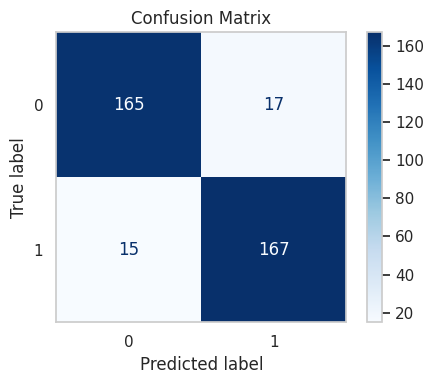

In [ ]:
logreg_v1 = LogisticRegression(random_state=42)
logreg_v1.fit(X_train_v1, y_train_v1)
evaluate_classifier(logreg_v1, X_test_v1, y_test_v1, model_name='Logistic Regression (v1)')


Performance Summary: Logistic Regression (v2)
Precision  : 0.8474
Recall     : 0.8496
F1 Score   : 0.8485
ROC AUC    : 0.9296


[[321  58]
 [ 57 322]]


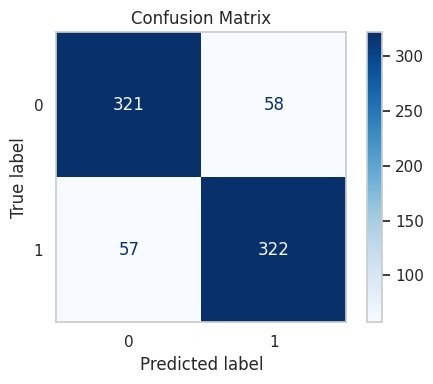

In [ ]:
logreg_v2 = LogisticRegression(random_state=42)
logreg_v2.fit(X_train_v2, y_train_v2)
evaluate_classifier(logreg_v2, X_test_v2, y_test_v2, model_name='Logistic Regression (v2)')

## Naive Bayes


Performance Summary: Naive Bayes (v1)
Precision  : 0.8601
Recall     : 0.9121
F1 Score   : 0.8853
ROC AUC    : 0.9374


[[155  27]
 [ 16 166]]


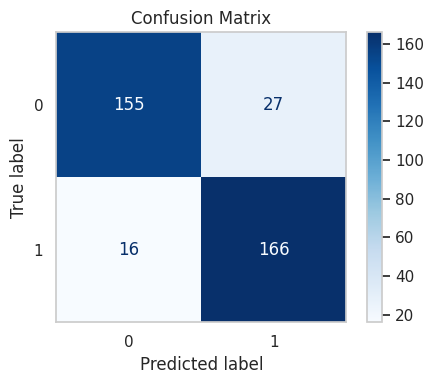

In [ ]:
nb_v1 = GaussianNB()
nb_v1.fit(X_train_v1, y_train_v1)
evaluate_classifier(nb_v1, X_test_v1, y_test_v1, model_name='Naive Bayes (v1)')


Performance Summary: Naive Bayes (v2)
Precision  : 0.6955
Recall     : 0.6992
F1 Score   : 0.6974
ROC AUC    : 0.8038


[[263 116]
 [114 265]]


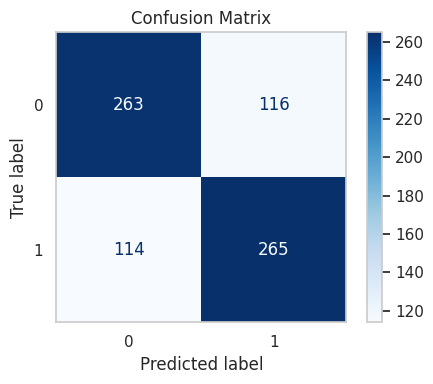

In [ ]:
nb_v2 = GaussianNB()
nb_v2.fit(X_train_v2, y_train_v2)
evaluate_classifier(nb_v2, X_test_v2, y_test_v2, model_name='Naive Bayes (v2)')

## K-Nearest Neighbor


Performance Summary: KNN (v1)
Precision  : 0.8916
Recall     : 0.9945
F1 Score   : 0.9403
ROC AUC    : 0.9811


[[160  22]
 [  1 181]]


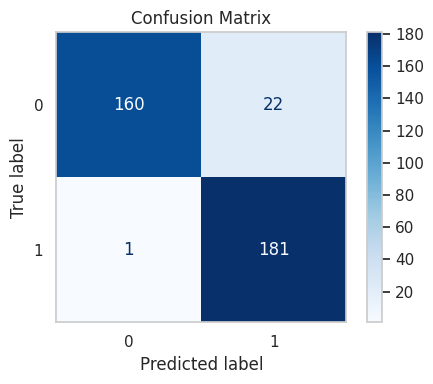

In [ ]:
knn_v1 = KNeighborsClassifier()
knn_v1.fit(X_train_v1, y_train_v1)
evaluate_classifier(knn_v1, X_test_v1, y_test_v1, model_name='KNN (v1)')


Performance Summary: KNN (v2)
Precision  : 0.8376
Recall     : 0.9393
F1 Score   : 0.8856
ROC AUC    : 0.9471


[[310  69]
 [ 23 356]]


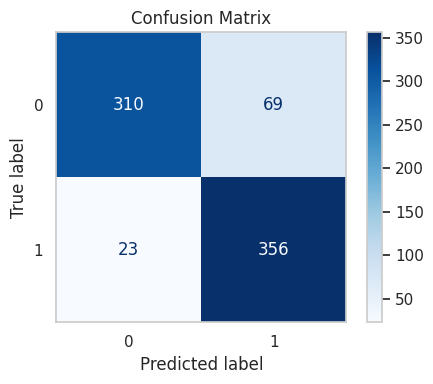

In [ ]:
knn_v2 = KNeighborsClassifier()
knn_v2.fit(X_train_v2, y_train_v2)
evaluate_classifier(knn_v2, X_test_v2, y_test_v2, model_name='KNN (v2)')

## Decision Tree


Performance Summary: Decision Tree (v1)
Precision  : 0.9066
Recall     : 0.9066
F1 Score   : 0.9066
ROC AUC    : 0.9066


[[165  17]
 [ 17 165]]


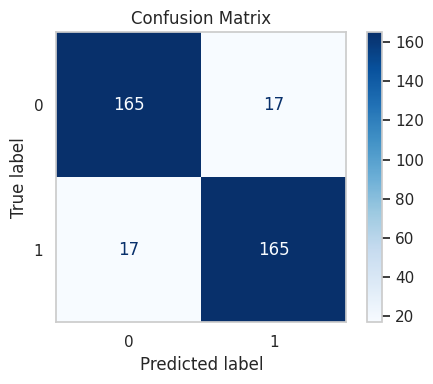

In [ ]:
dt_v1 = DecisionTreeClassifier(random_state=42)
dt_v1.fit(X_train_v1, y_train_v1)
evaluate_classifier(dt_v1, X_test_v1, y_test_v1, model_name='Decision Tree (v1)')


Performance Summary: Decision Tree (v2)
Precision  : 0.8740
Recall     : 0.8602
F1 Score   : 0.8670
ROC AUC    : 0.8710


[[332  47]
 [ 53 326]]


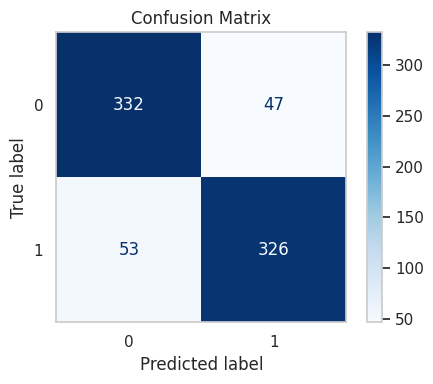

In [ ]:
dt_v2 = DecisionTreeClassifier(random_state=42)
dt_v2.fit(X_train_v2, y_train_v2)
evaluate_classifier(dt_v2, X_test_v2, y_test_v2, model_name='Decision Tree (v2)')

## Random Forest


Performance Summary: Random Forest (v1)
Precision  : 0.9524
Recall     : 0.9890
F1 Score   : 0.9704
ROC AUC    : 0.9870


[[173   9]
 [  2 180]]


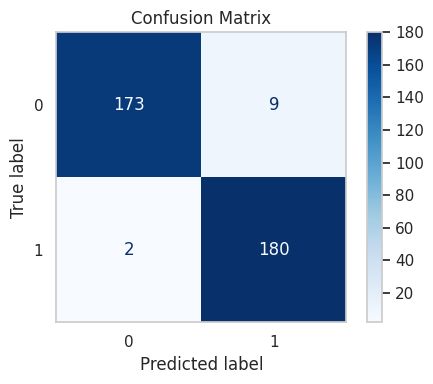

In [ ]:
rf_v1 = RandomForestClassifier(random_state=42)
rf_v1.fit(X_train_v1, y_train_v1)
evaluate_classifier(rf_v1, X_test_v1, y_test_v1, model_name='Random Forest (v1)')


Performance Summary: Random Forest (v2)
Precision  : 0.9248
Recall     : 0.9736
F1 Score   : 0.9486
ROC AUC    : 0.9857


[[349  30]
 [ 10 369]]


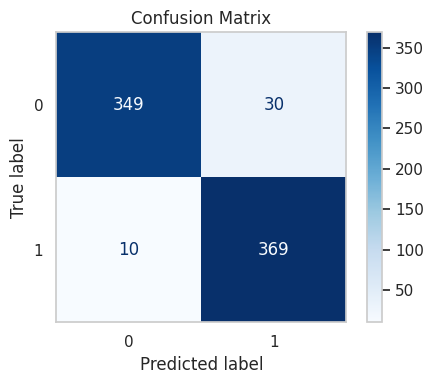

In [ ]:
rf_v2 = RandomForestClassifier(random_state=42)
rf_v2.fit(X_train_v2, y_train_v2)
evaluate_classifier(rf_v2, X_test_v2, y_test_v2, model_name='Random Forest (v2)')

## Extra Trees


Performance Summary: Extra Trees (v1)
Precision  : 0.9516
Recall     : 0.9725
F1 Score   : 0.9620
ROC AUC    : 0.9725


[[173   9]
 [  5 177]]


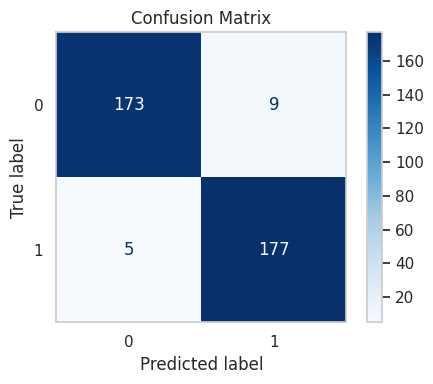

In [ ]:
et_v1 = ExtraTreesClassifier(random_state=42)
et_v1.fit(X_train_v1, y_train_v1)
evaluate_classifier(et_v1, X_test_v1, y_test_v1, model_name='Extra Trees (v1)')


Performance Summary: Extra Trees (v2)
Precision  : 0.9306
Recall     : 0.9551
F1 Score   : 0.9427
ROC AUC    : 0.9810


[[352  27]
 [ 17 362]]


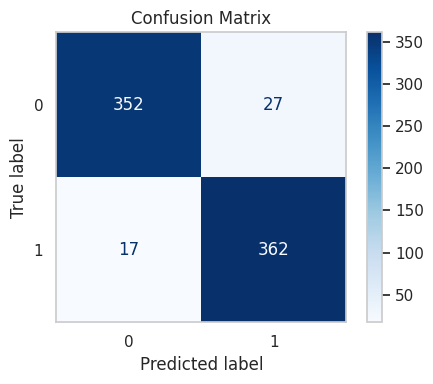

In [ ]:
et_v2 = ExtraTreesClassifier(random_state=42)
et_v2.fit(X_train_v2, y_train_v2)
evaluate_classifier(et_v2, X_test_v2, y_test_v2, model_name='Extra Trees (v2)')

## AdaBoost


Performance Summary: AdaBoost (v1)
Precision  : 0.9409
Recall     : 0.9615
F1 Score   : 0.9511
ROC AUC    : 0.9789


[[171  11]
 [  7 175]]


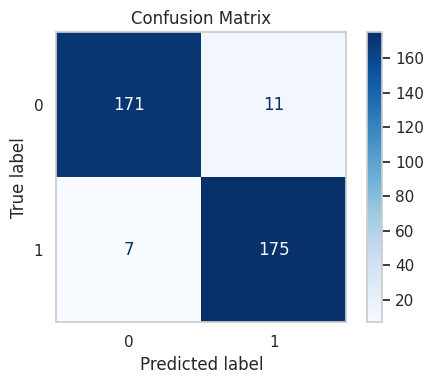

In [ ]:
ada_v1 = AdaBoostClassifier(random_state=42)
ada_v1.fit(X_train_v1, y_train_v1)
evaluate_classifier(ada_v1, X_test_v1, y_test_v1, model_name='AdaBoost (v1)')


Performance Summary: AdaBoost (v2)
Precision  : 0.8690
Recall     : 0.8575
F1 Score   : 0.8632
ROC AUC    : 0.9423


[[330  49]
 [ 54 325]]


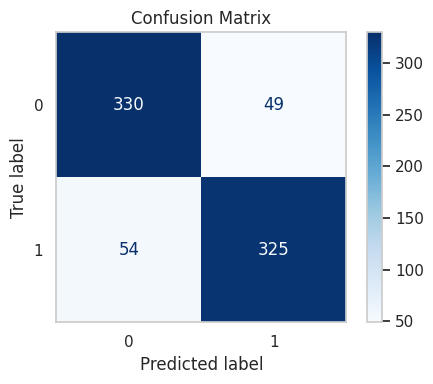

In [ ]:
ada_v2 = AdaBoostClassifier(random_state=42)
ada_v2.fit(X_train_v2, y_train_v2)
evaluate_classifier(ada_v2, X_test_v2, y_test_v2, model_name='AdaBoost (v2)')

## Gradient Boosting


Performance Summary: Gradient Boosting (v1)
Precision  : 0.9418
Recall     : 0.9780
F1 Score   : 0.9596
ROC AUC    : 0.9813


[[171  11]
 [  4 178]]


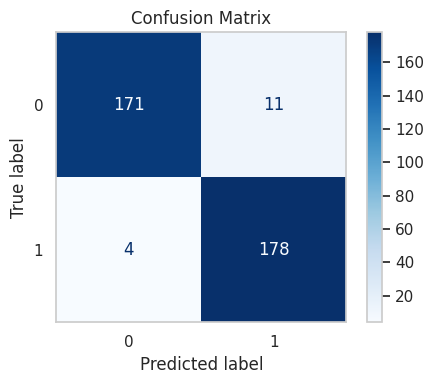

In [ ]:
gb_v1 = GradientBoostingClassifier(random_state=42)
gb_v1.fit(X_train_v1, y_train_v1)
evaluate_classifier(gb_v1, X_test_v1, y_test_v1, model_name='Gradient Boosting (v1)')


Performance Summary: Gradient Boosting (v2)
Precision  : 0.8923
Recall     : 0.9182
F1 Score   : 0.9051
ROC AUC    : 0.9657


[[337  42]
 [ 31 348]]


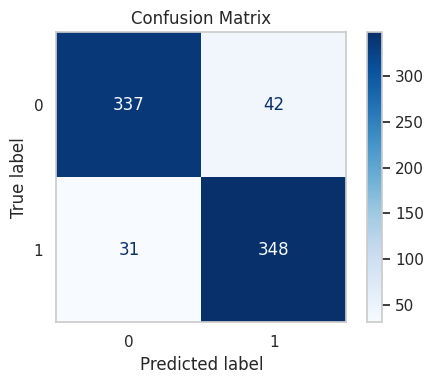

In [ ]:
gb_v2 = GradientBoostingClassifier(random_state=42)
gb_v2.fit(X_train_v2, y_train_v2)
evaluate_classifier(gb_v2, X_test_v2, y_test_v2, model_name='Gradient Boosting (v2)')

## Neural Network (MLPClassifier)


Performance Summary: Neural Network (v1)
Precision  : 0.9412
Recall     : 0.9670
F1 Score   : 0.9539
ROC AUC    : 0.9870


[[171  11]
 [  6 176]]


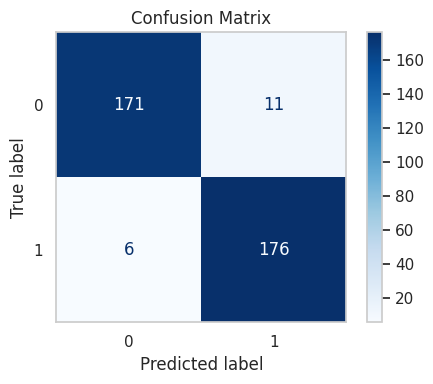

In [ ]:
nn_v1 = MLPClassifier(random_state=42, max_iter=500)
nn_v1.fit(X_train_v1, y_train_v1)
evaluate_classifier(nn_v1, X_test_v1, y_test_v1, model_name='Neural Network (v1)')


Performance Summary: Neural Network (v2)
Precision  : 0.9075
Recall     : 0.9314
F1 Score   : 0.9193
ROC AUC    : 0.9714


[[343  36]
 [ 26 353]]


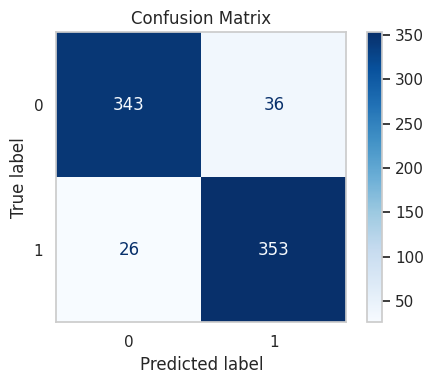

In [ ]:
nn_v2 = MLPClassifier(random_state=42, max_iter=500)
nn_v2.fit(X_train_v2, y_train_v2)
evaluate_classifier(nn_v2, X_test_v2, y_test_v2, model_name='Neural Network (v2)')